<center>
    <img src='https://github.com/vopani/fortyone/blob/main/images/logo_name_light_450_x_150.png?raw=true' align='center'>
    <br>
    Machine Learning begins with Human Learning
</center>

<center>
    <a href='https://github.com/vopani/fortyone/blob/master/LICENSE'>
        <img src='https://img.shields.io/badge/license-Apache%202.0-blue.svg?logo=apache' align='center'>
    </a>
    <a href='https://github.com/vopani/fortyone'>
        <img src='https://img.shields.io/github/stars/vopani/fortyone?color=yellowgreen&logo=github' align='center'>
    </a>
    <a href='https://twitter.com/vopani'>
        <img src='https://img.shields.io/twitter/follow/vopani' align='center'>
    </a>
</center>
<br>
<center>
    <a href='https://colab.research.google.com/github/vopani/fortyone/blob/main/notebooks/automl/tabular/H2O%20AutoML.ipynb'>
        <img src='https://img.shields.io/static/v1?label=&message=Open%20in%20Colab&labelColor=grey&color=blue&logo=google-colab' align='center'>
    </a>
    <a href='https://www.kaggle.com/rohanrao/fortyone-h2o-automl'>
        <img src='https://img.shields.io/static/v1?label=&message=Open%20in%20Kaggle&labelColor=grey&color=blue&logo=kaggle' align='center'>
    </a>
    <a href='https://mybinder.org/v2/gh/vopani/fortyone/main?filepath=notebooks%2Fautoml%2Ftabular%2FH2O%20AutoML.ipynb'>
        <img src='https://img.shields.io/static/v1?label=&message=Open%20in%20Binder&labelColor=grey&color=blue&logo=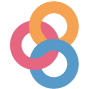' align='center'>
    </a>
    <a href='https://github.com/vopani/fortyone/blob/main/notebooks/automl/tabular/H2O%20AutoML.ipynb'>
        <img src='https://img.shields.io/static/v1?label=&message=Open%20in%20GitHub&labelColor=grey&color=blue&logo=github' align='center'>
    </a>
</center>

<center>
    <hr>
    <font size='7'>H2O AutoML</font>
    <br>
    <img src='https://docs.h2o.ai/h2o/latest-stable/h2o-docs/_images/h2o-automl-logo.jpg' width='150px' align='center'>
    <br>
    <a href='https://www.h2o.ai/products/h2o-automl'>H2O AutoML</a> is an automated machine learning library open sourced by <a href="https://h2o.ai">H2O.ai</a>
</center>

## Tutorial Dependencies
In order to get the full experience of this notebook, please install the following dependencies and follow the notebook in order.

* **Scikit-learn** for ML utilities
* **Pandas** for data utilities

In [ ]:
!python3 -m pip install --upgrade pip
!pip3 install scikit-learn==0.24.2
!pip3 install pandas

## 1. Install H2O AutoML
H2O AutoML is part of the `h2o` library that can be installed with pip.

In [ ]:
!pip3 install h2o

## 2. Upgrade H2O library
If you already have the `h2o` library installed, you can easily upgrade it to the latest version.

In [ ]:
!pip3 install h2o --upgrade

## 3. Check H2O version
The version of `H2O AutoML` is same as the version of the `h2o` library.

In [4]:
import h2o
from h2o.automl import H2OAutoML

print(h2o.__version__)

3.32.1.2


## 4. Intitialize H2O
Before using any functionality of `h2o`, it must first be initialized.

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /home/vopani/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpi3ecz1up
  JVM stdout: /tmp/tmpi3ecz1up/h2o_vopani_started_from_python.out
  JVM stderr: /tmp/tmpi3ecz1up/h2o_vopani_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_vopani_9e3lj3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,29.97 Gb
H2O_cluster_total_cores:,64
H2O_cluster_allowed_cores:,64
H2O_cluster_status:,"accepting new members, healthy"


## 5. Shutdown H2O
After completing the use of `h2o`, it can be shutdown.

In [6]:
import time

h2o.cluster().shutdown()

time.sleep(2)

H2O session _sid_ae83 closed.


## 6. Prepare data
`H2OAutoML` requires the input data as `H2O Frames`. Let's use the breast cancer dataset available in sklearn as an example.

In [7]:
import h2o
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)['data']
data['target'] = load_breast_cancer(as_frame=True)['target']

h2o.init()

h2o_train = h2o.H2OFrame(data)
h2o_train

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /home/vopani/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5lkw5wqj
  JVM stdout: /tmp/tmp5lkw5wqj/h2o_vopani_started_from_python.out
  JVM stderr: /tmp/tmp5lkw5wqj/h2o_vopani_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_vopani_vuxai5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,29.97 Gb
H2O_cluster_total_cores:,64
H2O_cluster_allowed_cores:,64
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0
20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902,0
19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,0
11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,0
20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678,0
12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244,0
18.25,19.98,119.6,1040,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151,0
13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072,0
12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.203,0.08243,0.2976,1.599,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.01008,15.09,40.68,97.65,711.4,0.1853,1.058,1.105,0.221,0.4366,0.2075,0


## 7. Run binary classification
The target variable needs to be a `factor` for AutoML to run a classifier.   
***P.S.*** *The runtime is limited to 60 seconds and nfolds is set to 0 for faster training*

In [8]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)['data']
data['target'] = load_breast_cancer(as_frame=True)['target']

h2o.init()

h2o_train = h2o.H2OFrame(data)
h2o_train['target'] = h2o_train['target'].asfactor()

h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0)
h2o_aml.train(y='target', training_frame=h2o_train)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_vopani_vuxai5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,29.97 Gb
H2O_cluster_total_cores:,64
H2O_cluster_allowed_cores:,64
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


## 8. Run multiclass classification
`Multiclass` classification can be run in the same way as binary. Let's use the iris dataset available in sklearn as an example.

In [9]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.datasets import load_iris

multiclass_data = load_iris(as_frame=True)['data']
multiclass_data['target'] = load_iris(as_frame=True)['target']

multiclass_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
h2o.init()

h2o_multiclass_train = h2o.H2OFrame(multiclass_data)
h2o_multiclass_train['target'] = h2o_multiclass_train['target'].asfactor()

h2o_multiclass_aml = H2OAutoML(max_runtime_secs=60, nfolds=0)
h2o_multiclass_aml.train(y='target', training_frame=h2o_multiclass_train)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 min 00 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_vopani_vuxai5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,29.94 Gb
H2O_cluster_total_cores:,64
H2O_cluster_allowed_cores:,64
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |███████████
23:39:48.30: Skipping training of model GBM_5_AutoML_20210502_233938 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20210502_233938.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 114.0.


█████████████████████████████████████████████| 100%


## 9. Run regression
`Regression` can be run using the target variable as numeric. Let's use the diabetes dataset available in sklearn as an example.

In [11]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.datasets import load_diabetes

regression_data = load_diabetes(as_frame=True)['data']
regression_data['target'] = load_diabetes(as_frame=True)['target']

regression_data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [12]:
h2o.init()

h2o_regression_train = h2o.H2OFrame(regression_data)
h2o_regression_train['target'] = h2o_regression_train['target'].asnumeric()

h2o_regression_aml = H2OAutoML(max_runtime_secs=60, nfolds=0)
h2o_regression_aml.train(y='target', training_frame=h2o_regression_train)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 min 57 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_vopani_vuxai5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,29.89 Gb
H2O_cluster_total_cores:,64
H2O_cluster_allowed_cores:,64
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


## 10. Check the leaderboard
The AutoML `leaderboard` shows you the various models built alongwith their respective performance.

In [13]:
h2o_aml.leaderboard.head(rows=h2o_aml.leaderboard.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_grid__2_AutoML_20210502_233840_model_1,0.998599,0.150008,0.999147,0.0238095,0.134808,0.0181733
XGBoost_grid__1_AutoML_20210502_233840_model_26,0.995798,0.129382,0.997364,0.0238095,0.175721,0.0308779
DeepLearning_grid__3_AutoML_20210502_233840_model_1,0.995798,0.147739,0.997364,0.0238095,0.137076,0.0187899
DeepLearning_grid__1_AutoML_20210502_233840_model_1,0.994398,0.434398,0.996431,0.0238095,0.13484,0.0181818
XGBoost_grid__1_AutoML_20210502_233840_model_35,0.994398,0.0824809,0.996431,0.0238095,0.143542,0.0206042
XGBoost_grid__1_AutoML_20210502_233840_model_47,0.994398,0.112742,0.996431,0.0238095,0.170871,0.029197
XGBoost_grid__1_AutoML_20210502_233840_model_12,0.994398,0.134709,0.996431,0.0238095,0.180099,0.0324355
XGBoost_grid__1_AutoML_20210502_233840_model_5,0.994398,0.115524,0.996431,0.0238095,0.163439,0.0267124
XGBoost_grid__1_AutoML_20210502_233840_model_3,0.994398,0.101562,0.996431,0.0238095,0.162452,0.0263907
XGBoost_grid__1_AutoML_20210502_233840_model_23,0.994398,0.141533,0.996431,0.0238095,0.190024,0.0361092


## 11. Get the best model
The best model is saved as the `leader`.

In [14]:
h2o_aml.leader

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__2_AutoML_20210502_233840_model_1


Status of Neuron Layers: predicting target, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,082 weights/biases, 22.5 KB, 4,590 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,15,,,,,,,,,
1,,2,20,RectifierDropout,10,0,0,0.000355878,0.000312709,0,0.00592705,0.199333,0.50254,0.0140235
2,,3,20,RectifierDropout,10,0,0,0.00192191,0.00806415,0,-0.0257128,0.20945,0.989744,0.0200281
3,,4,2,Softmax,,0,0,0.000190932,0.00011121,0,-0.289006,1.25212,-6.60533e-05,0.0409867




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.030082707029415928
RMSE: 0.173443671056098
LogLoss: 0.10872385101571842
Mean Per-Class Error: 0.03518862090290664
AUC: 0.9901360544217687
AUCPR: 0.990590123227068
Gini: 0.9802721088435373

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6385421194379336: 


,,0,1,Error,Rate
0,0,157.0,8.0,0.0485,(8.0/165.0)
1,1,7.0,287.0,0.0238,(7.0/294.0)
2,Total,164.0,295.0,0.0327,(15.0/459.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.638542,0.974533,247.0
1,max f2,0.172681,0.981246,269.0
2,max f0point5,0.869336,0.979197,227.0
3,max accuracy,0.638542,0.967320,247.0
4,max precision,0.999999,1.000000,0.0
5,max recall,0.087746,1.000000,280.0
6,max specificity,0.999999,1.000000,0.0
7,max absolute_mcc,0.638542,0.928951,247.0
8,max min_per_class_accuracy,0.708693,0.963636,242.0
9,max mean_per_class_accuracy,0.708693,0.964811,242.0



Gains/Lift Table: Avg response rate: 64.05 %, avg score: 65.02 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010893,0.999984,1.561224,1.561224,1.000000,0.999991,1.000000,0.999991,0.017007,0.017007,56.122449,56.122449,0.017007
1,2,0.021786,0.999977,1.561224,1.561224,1.000000,0.999980,1.000000,0.999985,0.017007,0.034014,56.122449,56.122449,0.034014
2,3,0.030501,0.999967,1.561224,1.561224,1.000000,0.999973,1.000000,0.999982,0.013605,0.047619,56.122449,56.122449,0.047619
3,4,0.041394,0.999946,1.561224,1.561224,1.000000,0.999955,1.000000,0.999975,0.017007,0.064626,56.122449,56.122449,0.064626
4,5,0.050109,0.999940,1.561224,1.561224,1.000000,0.999942,1.000000,0.999969,0.013605,0.078231,56.122449,56.122449,0.078231
5,6,0.100218,0.999773,1.493345,1.527285,0.956522,0.999872,0.978261,0.999920,0.074830,0.153061,49.334516,52.728483,0.147001
6,7,0.150327,0.999604,1.561224,1.538598,1.000000,0.999679,0.985507,0.999840,0.078231,0.231293,56.122449,53.859805,0.225232
7,8,0.200436,0.999327,1.561224,1.544255,1.000000,0.999481,0.989130,0.999750,0.078231,0.309524,56.122449,54.425466,0.303463
8,9,0.300654,0.998204,1.561224,1.549911,1.000000,0.998812,0.992754,0.999438,0.156463,0.465986,56.122449,54.991127,0.459926
9,10,0.400871,0.994478,1.561224,1.552740,1.000000,0.996628,0.994565,0.998735,0.156463,0.622449,56.122449,55.273957,0.616388




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.0074842164837317085
RMSE: 0.08651136621121937
LogLoss: 0.03527112729998174
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7476996974530007: 


,,0,1,Error,Rate
0,0,26.0,0.0,0.0,(0.0/26.0)
1,1,0.0,29.0,0.0,(0.0/29.0)
2,Total,26.0,29.0,0.0,(0.0/55.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.747700,1.000000,28.0
1,max f2,0.747700,1.000000,28.0
2,max f0point5,0.747700,1.000000,28.0
3,max accuracy,0.747700,1.000000,28.0
4,max precision,0.999960,1.000000,0.0
5,max recall,0.747700,1.000000,28.0
6,max specificity,0.999960,1.000000,0.0
7,max absolute_mcc,0.747700,1.000000,28.0
8,max min_per_class_accuracy,0.747700,1.000000,28.0
9,max mean_per_class_accuracy,0.747700,1.000000,28.0



Gains/Lift Table: Avg response rate: 52.73 %, avg score: 52.93 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.018182,0.999926,1.896552,1.896552,1.0,0.999960,1.000000,0.999960,0.034483,0.034483,89.655172,89.655172,0.034483
1,2,0.036364,0.999891,1.896552,1.896552,1.0,0.999897,1.000000,0.999929,0.034483,0.068966,89.655172,89.655172,0.068966
2,3,0.036364,0.999844,0.000000,1.896552,0.0,0.000000,1.000000,0.999929,0.000000,0.068966,-100.000000,89.655172,0.068966
3,4,0.054545,0.999797,1.896552,1.896552,1.0,0.999812,1.000000,0.999890,0.034483,0.103448,89.655172,89.655172,0.103448
4,5,0.054545,0.999747,0.000000,1.896552,0.0,0.000000,1.000000,0.999890,0.000000,0.103448,-100.000000,89.655172,0.103448
5,6,0.109091,0.999558,1.896552,1.896552,1.0,0.999632,1.000000,0.999761,0.103448,0.206897,89.655172,89.655172,0.206897
6,7,0.163636,0.999433,1.896552,1.896552,1.0,0.999509,1.000000,0.999677,0.103448,0.310345,89.655172,89.655172,0.310345
7,8,0.200000,0.998869,1.896552,1.896552,1.0,0.999133,1.000000,0.999578,0.068966,0.379310,89.655172,89.655172,0.379310
8,9,0.309091,0.997029,1.896552,1.896552,1.0,0.998174,1.000000,0.999083,0.206897,0.586207,89.655172,89.655172,0.586207
9,10,0.400000,0.975483,1.896552,1.896552,1.0,0.991612,1.000000,0.997385,0.172414,0.758621,89.655172,89.655172,0.758621




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-05-02 23:39:29,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-05-02 23:39:29,0.103 sec,148064 obs/sec,10.0,1,4590.0,0.173444,0.108724,0.86935,...,0.99059,1.561224,0.03268,0.086511,0.035271,0.969974,1.0,1.0,1.896552,0.0



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,mean area,1.000000,1.000000,0.041204
1,texture error,0.965574,0.965574,0.039786
2,worst texture,0.949236,0.949236,0.039112
3,worst symmetry,0.949085,0.949085,0.039106
4,concavity error,0.939539,0.939539,0.038713
5,mean concavity,0.921720,0.921720,0.037979
6,perimeter error,0.902045,0.902045,0.037168
7,fractal dimension error,0.888801,0.888801,0.036622
8,worst area,0.858504,0.858504,0.035374
9,radius error,0.840755,0.840755,0.034643



See the whole table with table.as_data_frame()


## 12. Get any model
Any of the built models can be extracted and explored using it's `model_id`.

In [15]:
model_id = h2o_aml.leaderboard.as_data_frame().model_id[4]
print(f'Model: {model_id}')

h2o.get_model(model_id)

Model: XGBoost_grid__1_AutoML_20210502_233840_model_35
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid__1_AutoML_20210502_233840_model_35


Model Summary: 


,,number_of_trees
0,,65.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.016507746592164065
RMSE: 0.12848247581738167
LogLoss: 0.07209672989162823
Mean Per-Class Error: 0.01589363017934442
AUC: 0.9960214388785817
AUCPR: 0.9973485666323739
Gini: 0.9920428777571635

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4413670599460602: 


,,0,1,Error,Rate
0,0,159.0,6.0,0.0364,(6.0/165.0)
1,1,1.0,293.0,0.0034,(1.0/294.0)
2,Total,160.0,299.0,0.0153,(7.0/459.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.441367,0.988196,244.0
1,max f2,0.368815,0.994587,247.0
2,max f0point5,0.645630,0.989086,238.0
3,max accuracy,0.645630,0.984749,238.0
4,max precision,0.998877,1.000000,0.0
5,max recall,0.368815,1.000000,247.0
6,max specificity,0.998877,1.000000,0.0
7,max absolute_mcc,0.645630,0.966938,238.0
8,max min_per_class_accuracy,0.646084,0.981818,237.0
9,max mean_per_class_accuracy,0.645630,0.984106,238.0



Gains/Lift Table: Avg response rate: 64.05 %, avg score: 63.97 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010893,0.998388,1.561224,1.561224,1.000000,0.998620,1.000000,0.998620,0.017007,0.017007,56.122449,56.122449,0.017007
1,2,0.021786,0.998112,1.561224,1.561224,1.000000,0.998281,1.000000,0.998451,0.017007,0.034014,56.122449,56.122449,0.034014
2,3,0.030501,0.997974,1.561224,1.561224,1.000000,0.998027,1.000000,0.998330,0.013605,0.047619,56.122449,56.122449,0.047619
3,4,0.041394,0.997772,1.561224,1.561224,1.000000,0.997882,1.000000,0.998212,0.017007,0.064626,56.122449,56.122449,0.064626
4,5,0.050109,0.997629,1.561224,1.561224,1.000000,0.997726,1.000000,0.998127,0.013605,0.078231,56.122449,56.122449,0.078231
5,6,0.122004,0.997170,1.561224,1.561224,1.000000,0.997322,1.000000,0.997653,0.112245,0.190476,56.122449,56.122449,0.190476
6,7,0.150327,0.996626,1.561224,1.561224,1.000000,0.996891,1.000000,0.997509,0.044218,0.234694,56.122449,56.122449,0.234694
7,8,0.200436,0.995715,1.561224,1.561224,1.000000,0.996211,1.000000,0.997185,0.078231,0.312925,56.122449,56.122449,0.312925
8,9,0.300654,0.992511,1.561224,1.561224,1.000000,0.994135,1.000000,0.996168,0.156463,0.469388,56.122449,56.122449,0.469388
9,10,0.400871,0.983931,1.527285,1.552740,0.978261,0.988873,0.994565,0.994344,0.153061,0.622449,52.728483,55.273957,0.616388




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.0148488054585515
RMSE: 0.12185567470803935
LogLoss: 0.06645583123326919
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7056212425231934: 


,,0,1,Error,Rate
0,0,26.0,0.0,0.0,(0.0/26.0)
1,1,0.0,29.0,0.0,(0.0/29.0)
2,Total,26.0,29.0,0.0,(0.0/55.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.705621,1.000000,28.0
1,max f2,0.705621,1.000000,28.0
2,max f0point5,0.705621,1.000000,28.0
3,max accuracy,0.705621,1.000000,28.0
4,max precision,0.998134,1.000000,0.0
5,max recall,0.705621,1.000000,28.0
6,max specificity,0.998134,1.000000,0.0
7,max absolute_mcc,0.705621,1.000000,28.0
8,max min_per_class_accuracy,0.705621,1.000000,28.0
9,max mean_per_class_accuracy,0.705621,1.000000,28.0



Gains/Lift Table: Avg response rate: 52.73 %, avg score: 54.09 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.018182,0.997613,1.896552,1.896552,1.0,0.998134,1.000000,0.998134,0.034483,0.034483,89.655172,89.655172,0.034483
1,2,0.036364,0.997151,1.896552,1.896552,1.0,0.997170,1.000000,0.997652,0.034483,0.068966,89.655172,89.655172,0.068966
2,3,0.036364,0.997025,0.000000,1.896552,0.0,0.000000,1.000000,0.997652,0.000000,0.068966,-100.000000,89.655172,0.068966
3,4,0.054545,0.996864,1.896552,1.896552,1.0,0.996936,1.000000,0.997413,0.034483,0.103448,89.655172,89.655172,0.103448
4,5,0.054545,0.996618,0.000000,1.896552,0.0,0.000000,1.000000,0.997413,0.000000,0.103448,-100.000000,89.655172,0.103448
5,6,0.109091,0.995619,1.896552,1.896552,1.0,0.996115,1.000000,0.996764,0.103448,0.206897,89.655172,89.655172,0.206897
6,7,0.163636,0.995003,1.896552,1.896552,1.0,0.995378,1.000000,0.996302,0.103448,0.310345,89.655172,89.655172,0.310345
7,8,0.200000,0.992761,1.896552,1.896552,1.0,0.994649,1.000000,0.996001,0.068966,0.379310,89.655172,89.655172,0.379310
8,9,0.309091,0.983132,1.896552,1.896552,1.0,0.989529,1.000000,0.993717,0.206897,0.586207,89.655172,89.655172,0.586207
9,10,0.400000,0.966885,1.896552,1.896552,1.0,0.971146,1.000000,0.988587,0.172414,0.758621,89.655172,89.655172,0.758621




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-05-02 23:39:02,7.649 sec,0.0,0.500000,0.693147,0.500000,0.640523,1.000000,0.359477,0.500000,0.693147,0.500000,0.527273,1.000000,0.472727
1,,2021-05-02 23:39:02,7.669 sec,5.0,0.206930,0.200055,0.990765,0.992199,1.553379,0.032680,0.247093,0.243218,0.986737,0.988250,1.896552,0.054545
2,,2021-05-02 23:39:02,7.686 sec,10.0,0.165131,0.119385,0.993465,0.995806,1.561224,0.026144,0.206263,0.155661,0.989390,0.990904,1.896552,0.054545
3,,2021-05-02 23:39:03,7.702 sec,15.0,0.153853,0.098211,0.994578,0.996542,1.561224,0.021786,0.158790,0.101823,0.998674,0.998831,1.896552,0.018182
4,,2021-05-02 23:39:03,7.715 sec,20.0,0.146134,0.088569,0.995083,0.996799,1.561224,0.021786,0.164194,0.100048,0.997347,0.997621,1.896552,0.018182
5,,2021-05-02 23:39:03,7.729 sec,25.0,0.136202,0.081034,0.995156,0.996697,1.561224,0.017429,0.140199,0.080606,0.998674,0.998831,1.896552,0.018182
6,,2021-05-02 23:39:03,7.744 sec,30.0,0.138087,0.080191,0.995217,0.996850,1.561224,0.019608,0.132783,0.075327,0.998674,0.998831,1.896552,0.018182
7,,2021-05-02 23:39:03,7.760 sec,35.0,0.135818,0.078203,0.995640,0.997129,1.561224,0.017429,0.130805,0.073724,1.000000,1.000000,1.896552,0.000000
8,,2021-05-02 23:39:03,7.775 sec,40.0,0.135198,0.076605,0.995733,0.997233,1.561224,0.017429,0.129968,0.072438,1.000000,1.000000,1.896552,0.000000
9,,2021-05-02 23:39:03,7.789 sec,45.0,0.133071,0.074692,0.996125,0.997476,1.561224,0.015251,0.129889,0.071908,1.000000,1.000000,1.896552,0.000000



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,worst area,301.879730,1.000000,0.458729
1,worst concave points,98.158981,0.325159,0.149160
2,mean concave points,85.614395,0.283604,0.130098
3,mean concavity,42.267502,0.140014,0.064229
4,worst perimeter,26.073475,0.086370,0.039621
5,worst texture,25.395334,0.084124,0.038590
6,mean area,21.871668,0.072452,0.033236
7,mean texture,11.548939,0.038257,0.017549
8,worst radius,9.813595,0.032508,0.014912
9,area error,8.265882,0.027381,0.012561



See the whole table with table.as_data_frame()


## 13. Use validation split
A separate `validation dataset` can be provided during training. Let's split the dataset into train-valid using 80-20 split.

In [16]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(data, train_size=0.8, random_state=41)
print(f'Train Data shape: {train.shape}')
print(f'Valid Data shape: {valid.shape}')

h2o_train = h2o.H2OFrame(train)
h2o_valid = h2o.H2OFrame(valid)

h2o_train['target'] = h2o_train['target'].asfactor()

h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0)
h2o_aml.train(y='target', training_frame=h2o_train, validation_frame=h2o_valid)
h2o_aml.leaderboard

Train Data shape: (455, 31)
Valid Data shape: (114, 31)
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_20210502_234129,1,0.110727,1,0,0.197473,0.0389958
GBM_grid__1_AutoML_20210502_234129_model_5,1,0.169144,1,0,0.232274,0.0539514
GBM_2_AutoML_20210502_234129,1,0.109675,1,0,0.180978,0.0327532
GBM_grid__1_AutoML_20210502_234129_model_15,1,0.187133,1,0,0.224588,0.0504398
GBM_grid__1_AutoML_20210502_234129_model_4,1,0.102306,1,0,0.186763,0.0348806
GBM_grid__1_AutoML_20210502_234129_model_1,1,0.120226,1,0,0.188378,0.0354864
GBM_grid__1_AutoML_20210502_234129_model_9,1,0.127813,1,0,0.194706,0.0379103
GBM_grid__1_AutoML_20210502_234129_model_8,1,0.112888,1,0,0.19882,0.0395294
XGBoost_grid__1_AutoML_20210502_234129_model_65,1,0.13329,1,0,0.193852,0.0375786
GBM_3_AutoML_20210502_234129,1,0.104426,1,0,0.171968,0.0295728


## 14. Use cross-validation
Running cross validation during training is inbuilt using `nfolds`.

In [17]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=3)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_grid__1_AutoML_20210502_234226_model_4,0.991823,0.127087,0.993588,0.0280426,0.164214,0.0269663
DeepLearning_grid__3_AutoML_20210502_234226_model_4,0.991721,0.170057,0.991451,0.0227422,0.160289,0.0256926
GLM_1_AutoML_20210502_234226,0.99133,0.100519,0.993181,0.0314631,0.162786,0.0264991
GBM_grid__1_AutoML_20210502_234226_model_1,0.990036,0.118961,0.993246,0.0367635,0.179478,0.0322123
StackedEnsemble_BestOfFamily_AutoML_20210502_234226,0.989769,0.0996034,0.991627,0.0327163,0.159926,0.0255762
GBM_2_AutoML_20210502_234226,0.989605,0.125985,0.993141,0.0553456,0.18837,0.0354833
GBM_3_AutoML_20210502_234226,0.98943,0.132994,0.99304,0.0478778,0.191898,0.0368248
GBM_grid__1_AutoML_20210502_234226_model_3,0.989266,0.124454,0.992464,0.0472512,0.185364,0.0343598
GBM_grid__1_AutoML_20210502_234226_model_7,0.989235,0.134961,0.9931,0.0553456,0.194324,0.0377619
DeepLearning_grid__2_AutoML_20210502_234226_model_3,0.989122,0.201288,0.989724,0.0414373,0.182512,0.0333105


## 15. Use customized folds for cross-validation
You can provide a `fold column` to customize the folds for cross-validation.

In [18]:
import random

h2o_train['fold_col'] = h2o.H2OFrame([random.randint(0, 2) for i in range(h2o_train.nrows)])

h2o_aml = H2OAutoML(max_runtime_secs=60)
h2o_aml.train(y='target', training_frame=h2o_train, fold_column='fold_col')
h2o_aml.leaderboard

h2o_train = h2o_train.drop('fold_col')

Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |
23:43:20.165: Fold column fold_col will be used for cross-validation. nfolds parameter will be ignored.

████████████████████████████████████████████████████████| 100%


## 16. Get the cross-validation predictions
The cross validation predictions can be extracted by enabling the `keep_cross_validation` settings.

In [19]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=3,
                    keep_cross_validation_fold_assignment=True, keep_cross_validation_predictions=True)
h2o_aml.train(y='target', training_frame=h2o_train)

cv_preds = h2o_aml.leader.cross_validation_predictions()[0].as_data_frame()

for df in h2o_aml.leader.cross_validation_predictions()[1:]:
    cv_preds += cv_preds + df.as_data_frame()

h2o_train['fold'] = h2o_aml.leader.cross_validation_fold_assignment()
h2o_train = h2o_train.cbind(h2o.H2OFrame(cv_preds))
h2o_train

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,fold,predict,p0,p1
12.83,15.73,82.89,506.9,0.0904,0.08269,0.05835,0.03078,0.1705,0.05913,0.1499,0.4875,1.195,11.64,0.004873,0.01796,0.03318,0.00836,0.01601,0.002289,14.09,19.35,93.22,605.8,0.1326,0.261,0.3476,0.09783,0.3006,0.07802,1,0,4,0.0645195,3.93548
14.26,18.17,91.22,633.1,0.06576,0.0522,0.02475,0.01374,0.1635,0.05586,0.23,0.669,1.661,20.56,0.003169,0.01377,0.01079,0.005243,0.01103,0.001957,16.22,25.26,105.8,819.7,0.09445,0.2167,0.1565,0.0753,0.2636,0.07676,1,1,2,0.0131278,1.98687
13.65,13.16,87.88,568.9,0.09646,0.08711,0.03888,0.02563,0.136,0.06344,0.2102,0.4336,1.391,17.4,0.004133,0.01695,0.01652,0.006659,0.01371,0.002735,15.34,16.35,99.71,706.2,0.1311,0.2474,0.1759,0.08056,0.238,0.08718,1,2,1,0.0119883,0.988012
10.82,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,0.06328,0.5196,1.918,3.564,33,0.008263,0.0187,0.01277,0.005917,0.02466,0.002977,13.03,31.45,83.9,505.6,0.1204,0.1633,0.06194,0.03264,0.3059,0.07626,1,0,4,0.117238,3.88276
20.6,29.33,140.1,1265,0.1178,0.277,0.3514,0.152,0.2397,0.07016,0.726,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.74,39.42,184.6,1821,0.165,0.8681,0.9387,0.265,0.4087,0.124,0,1,0,2,1.23595e-08
10.91,12.35,69.14,363.7,0.08518,0.04721,0.01236,0.01369,0.1449,0.06031,0.1753,1.027,1.267,11.09,0.003478,0.01221,0.01072,0.009393,0.02941,0.003428,11.37,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643,1,2,1,2.84282e-05,0.999972
14.45,20.22,94.49,642.7,0.09872,0.1206,0.118,0.0598,0.195,0.06466,0.2092,0.6509,1.446,19.42,0.004044,0.01597,0.02,0.007303,0.01522,0.001976,18.33,30.12,117.9,1044,0.1552,0.4056,0.4967,0.1838,0.4753,0.1013,0,0,0,3.97546,0.024536
11.52,14.93,73.87,406.3,0.1013,0.07808,0.04328,0.02929,0.1883,0.06168,0.2562,1.038,1.686,18.62,0.006662,0.01228,0.02105,0.01006,0.01677,0.002784,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809,1,1,2,0.00698489,1.99302
13.49,22.3,86.91,561,0.08752,0.07698,0.04751,0.03384,0.1809,0.05718,0.2338,1.353,1.735,20.2,0.004455,0.01382,0.02095,0.01184,0.01641,0.001956,15.15,31.82,99,698.8,0.1162,0.1711,0.2282,0.1282,0.2871,0.06917,1,2,1,0.192917,0.807083
18.65,17.6,123.7,1076,0.1099,0.1686,0.1974,0.1009,0.1907,0.06049,0.6289,0.6633,4.293,71.56,0.006294,0.03994,0.05554,0.01695,0.02428,0.003535,22.82,21.32,150.6,1567,0.1679,0.509,0.7345,0.2378,0.3799,0.09185,0,0,0,3.9999,9.7138e-05


## 17. Predict on test data
Once the model is built, it can be used to `predict` on any unseen test data. Let's split the dataset into train-test using 80-20 split.

In [20]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, train_size=0.8, random_state=41)
print(f'Train Data shape: {train.shape}')
print(f'Test Data shape: {test.shape}')

h2o_train = h2o.H2OFrame(train)
h2o_test = h2o.H2OFrame(test)

h2o_train['target'] = h2o_train['target'].asfactor()

h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0)
h2o_aml.train(y='target', training_frame=h2o_train)

h2o_preds = h2o_aml.predict(h2o_test)
h2o_preds

Train Data shape: (455, 31)
Test Data shape: (114, 31)
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.00239742,0.997603
1,0.0214652,0.978535
1,0.081394,0.918606
1,0.0710825,0.928917
1,0.00309869,0.996901
1,0.00237573,0.997624
0,0.978908,0.0210917
0,0.994922,0.00507828
0,0.995107,0.0048926
1,0.00238132,0.997619


## 18. Set limits to training
The default maximum runtime is 1 hour but it is recommended to use `max_runtime_secs` and `max_models` to set your own runtimes.

In [21]:
# setting max_runtime_secs
h2o_aml = H2OAutoML(max_runtime_secs=41, nfolds=0)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210502_234616_model_15,1,0.0967631,1,0,0.177465,0.0314938
GBM_grid__1_AutoML_20210502_234616_model_22,1,0.103133,1,0,0.177552,0.0315247
GBM_grid__1_AutoML_20210502_234616_model_1,1,0.111071,1,0,0.19111,0.0365231
GBM_grid__1_AutoML_20210502_234616_model_8,1,0.108316,1,0,0.191772,0.0367766
GBM_grid__1_AutoML_20210502_234616_model_17,0.998051,0.106181,0.998653,0.0263158,0.170665,0.0291265
GBM_4_AutoML_20210502_234616,0.998051,0.122107,0.998653,0.0263158,0.182681,0.0333725
GLM_1_AutoML_20210502_234616,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_grid__1_AutoML_20210502_234616_model_24,0.998051,0.115799,0.998653,0.0263158,0.193871,0.037586
GBM_grid__1_AutoML_20210502_234616_model_5,0.998051,0.123175,0.998653,0.0263158,0.202883,0.0411616
GBM_grid__1_AutoML_20210502_234616_model_11,0.998051,0.117984,0.998653,0.0263158,0.194742,0.0379245


In [22]:
# setting max_models
h2o_aml = H2OAutoML(max_models=41, nfolds=0)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_4_AutoML_20210502_234656,1,0.0930727,1,0,0.164779,0.0271522
GBM_grid__1_AutoML_20210502_234656_model_3,1,0.102897,1,0,0.183696,0.0337442
DeepLearning_grid__1_AutoML_20210502_234656_model_2,1,0.0958584,1,0,0.181041,0.0327759
XGBoost_grid__1_AutoML_20210502_234656_model_5,1,0.11856,1,0,0.183987,0.0338514
DeepLearning_grid__3_AutoML_20210502_234656_model_1,0.998051,0.0757769,0.998653,0.0263158,0.159685,0.0254994
GBM_grid__1_AutoML_20210502_234656_model_2,0.998051,0.102941,0.998653,0.0263158,0.170057,0.0289195
DeepLearning_grid__2_AutoML_20210502_234656_model_1,0.998051,0.0672556,0.998653,0.0263158,0.139944,0.0195845
GBM_2_AutoML_20210502_234656,0.998051,0.107657,0.998653,0.0263158,0.182069,0.0331492
GLM_1_AutoML_20210502_234656,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_3_AutoML_20210502_234656,0.998051,0.111369,0.998653,0.0263158,0.18203,0.0331351


In [23]:
# setting max_runtime_secs and max_models
h2o_aml = H2OAutoML(max_runtime_secs=41, max_models=41, nfolds=0)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210502_234755_model_3,1,0.0903455,1,0,0.163949,0.0268793
GBM_grid__1_AutoML_20210502_234755_model_4,0.998051,0.111991,0.998653,0.0263158,0.182312,0.0332377
GLM_1_AutoML_20210502_234755,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_grid__1_AutoML_20210502_234755_model_5,0.996101,0.149018,0.997255,0.0263158,0.211994,0.0449416
GBM_grid__1_AutoML_20210502_234755_model_2,0.996101,0.130731,0.997401,0.0185185,0.202892,0.0411651
XRT_1_AutoML_20210502_234755,0.996101,0.14068,0.997401,0.0185185,0.208131,0.0433185
GBM_grid__1_AutoML_20210502_234755_model_6,0.996101,0.136933,0.997255,0.0263158,0.200044,0.0400177
GBM_1_AutoML_20210502_234755,0.996101,0.128933,0.997255,0.0263158,0.172413,0.0297261
GBM_4_AutoML_20210502_234755,0.996101,0.128766,0.997255,0.0263158,0.197885,0.0391585
GBM_2_AutoML_20210502_234755,0.996101,0.114962,0.997255,0.0263158,0.183215,0.0335678


## 19. Add sample weights
Weights for samples / observations can be included as a `weights_column`.

In [24]:
import random

h2o_train = h2o.H2OFrame(train)
h2o_train['target'] = h2o_train['target'].asfactor()

h2o_train['weight_col'] = h2o.H2OFrame([random.random() for i in range(h2o_train.nrows)])

h2o_aml = H2OAutoML(max_runtime_secs=60)
h2o_aml.train(y='target', training_frame=h2o_train, weights_column='weight_col')
h2o_aml.leaderboard

h2o_train = h2o_train.drop('weight_col')

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |███████████
23:48:43.640: GBM_5_AutoML_20210502_234833 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20210502_234833.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 185.8463168157263.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 183.47169107902894.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 183.55005055265187.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but

## 20. Check models used in Stacked Ensemble
The StackedEnsemble models are an inbuilt ensemble of multiple base models. The models and weights can be extracted using the model metalearner's `coef_norm` attribute.

In [25]:
h2o_aml = H2OAutoML(max_runtime_secs=60)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_grid__3_AutoML_20210502_234936_model_3,0.992111,0.130042,0.99447,0.0355103,0.158197,0.0250264
StackedEnsemble_BestOfFamily_AutoML_20210502_234936,0.991567,0.095577,0.993766,0.0320897,0.159109,0.0253156
DeepLearning_grid__3_AutoML_20210502_234936_model_4,0.991536,0.155649,0.993615,0.0443442,0.181734,0.0330273
DeepLearning_1_AutoML_20210502_234936,0.990878,0.103654,0.993246,0.0314631,0.168,0.0282242
GLM_1_AutoML_20210502_234936,0.990344,0.103951,0.992386,0.0314631,0.163797,0.0268294
DeepLearning_grid__1_AutoML_20210502_234936_model_4,0.989677,0.127302,0.990761,0.0291828,0.156498,0.0244916
GBM_grid__1_AutoML_20210502_234936_model_3,0.989584,0.12165,0.992739,0.051812,0.183864,0.0338059
DeepLearning_grid__2_AutoML_20210502_234936_model_3,0.989235,0.290057,0.988998,0.0308366,0.178702,0.0319344
GBM_3_AutoML_20210502_234936,0.989101,0.127625,0.992347,0.0404101,0.191235,0.0365708
GBM_grid__1_AutoML_20210502_234936_model_2,0.988927,0.120459,0.992184,0.0402971,0.182535,0.0333189


In [26]:
stacked_ensemble_model_id = [x for x in h2o_aml.leaderboard.as_data_frame().model_id if 'StackedEnsemble' in x][0]
stacked_ensemble_model = h2o.get_model(stacked_ensemble_model_id)
stacked_ensemble_model.metalearner().coef_norm()

{'Intercept': 1.029061039291396,
 'DeepLearning_grid__3_AutoML_20210502_234936_model_3': 4.482112795393465,
 'GLM_1_AutoML_20210502_234936': 0.3365434300423706,
 'GBM_grid__1_AutoML_20210502_234936_model_3': 1.0776313803923965,
 'XGBoost_grid__1_AutoML_20210502_234936_model_10': 0.0,
 'XRT_1_AutoML_20210502_234936': 0.0,
 'DRF_1_AutoML_20210502_234936': 0.0}

## 21. Disable StackedEnsemble
StackedEnsemble can be disabled using `exclude_algos` but will likely lead to suboptimal results.

In [27]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    exclude_algos=['StackedEnsemble'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210502_235033_model_22,1,0.0952396,1,0,0.174983,0.0306191
GBM_grid__1_AutoML_20210502_235033_model_24,1,0.103408,1,0,0.181004,0.0327626
GBM_grid__1_AutoML_20210502_235033_model_39,1,0.107007,1,0,0.18991,0.0360656
GBM_grid__1_AutoML_20210502_235033_model_26,0.998051,0.107696,0.998653,0.0263158,0.181032,0.0327726
GBM_4_AutoML_20210502_235033,0.998051,0.11453,0.998653,0.0263158,0.195434,0.0381946
GBM_grid__1_AutoML_20210502_235033_model_40,0.998051,0.12663,0.998653,0.0263158,0.198573,0.039431
GBM_grid__1_AutoML_20210502_235033_model_34,0.998051,0.119057,0.998653,0.0263158,0.190628,0.036339
GBM_grid__1_AutoML_20210502_235033_model_25,0.998051,0.102139,0.998653,0.0263158,0.165364,0.0273452
GBM_grid__1_AutoML_20210502_235033_model_51,0.998051,0.127817,0.998653,0.0263158,0.19876,0.0395057
GBM_grid__1_AutoML_20210502_235033_model_6,0.998051,0.0770617,0.998653,0.0263158,0.149441,0.0223326


## 22. Choose evaluation metric
The default metrics are `logloss` for classification and `deviance` for regression and can be replaced with any of the [supported list of metrics](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/stopping_metric.html).

In [28]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    stopping_metric='AUC', sort_metric='AUC')
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_20210502_235135,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
DeepLearning_grid__2_AutoML_20210502_235135_model_2,0.998051,0.0356017,0.998653,0.0263158,0.116414,0.0135522
GBM_3_AutoML_20210502_235135,0.996101,0.152506,0.997255,0.0263158,0.20852,0.0434806
DeepLearning_grid__3_AutoML_20210502_235135_model_1,0.996101,0.149469,0.997401,0.0185185,0.199831,0.0399324
DRF_1_AutoML_20210502_235135,0.996101,0.146905,0.997227,0.0263158,0.214182,0.045874
GBM_2_AutoML_20210502_235135,0.996101,0.170177,0.997255,0.0263158,0.22947,0.0526566
XGBoost_grid__1_AutoML_20210502_235135_model_7,0.996101,0.130575,0.997255,0.0263158,0.196577,0.0386425
XGBoost_1_AutoML_20210502_235135,0.996101,0.132761,0.997401,0.0185185,0.195397,0.0381799
GBM_grid__1_AutoML_20210502_235135_model_5,0.996101,0.169015,0.997255,0.0263158,0.219729,0.0482809
GBM_grid__1_AutoML_20210502_235135_model_1,0.994152,0.156853,0.995803,0.0263158,0.210477,0.0443007


## 23. Use early stopping
Early `stopping` can be used to control overfitting and reduce training time.

In [29]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    stopping_metric='AUC', stopping_tolerance=0.05, stopping_rounds=5)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid__1_AutoML_20210502_235223_model_6,1,0.134845,1,0,0.186289,0.0347035
GBM_grid__1_AutoML_20210502_235223_model_7,1,0.111699,1,0,0.189163,0.0357827
GLM_1_AutoML_20210502_235223,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
XGBoost_1_AutoML_20210502_235223,0.998051,0.127133,0.998653,0.0263158,0.188524,0.0355412
DeepLearning_grid__2_AutoML_20210502_235223_model_1,0.998051,0.176193,0.998653,0.0263158,0.199734,0.0398936
GBM_1_AutoML_20210502_235223,0.996101,0.121327,0.997255,0.0263158,0.168854,0.0285116
GBM_grid__1_AutoML_20210502_235223_model_4,0.996101,0.162368,0.997401,0.0185185,0.230529,0.0531437
GBM_grid__1_AutoML_20210502_235223_model_5,0.996101,0.133835,0.997255,0.0263158,0.203723,0.0415029
DeepLearning_grid__3_AutoML_20210502_235223_model_1,0.996101,0.117415,0.997255,0.0263158,0.15759,0.0248347
GBM_2_AutoML_20210502_235223,0.996101,0.128451,0.997255,0.0263158,0.195129,0.0380751


## 24. Enable training of only certain type of models
You can provide any of the [list of supported models](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/include_algos.html) to include in training using `include_algos`.

In [30]:
# train only linear models
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    include_algos=['GLM'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_20210502_235315,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138


In [31]:
# train only boosting models
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    include_algos=['GBM', 'XGBoost'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210502_235318_model_33,1,0.130462,1,0,0.213536,0.0455977
GBM_grid__1_AutoML_20210502_235318_model_57,1,0.111824,1,0,0.179981,0.0323931
GBM_grid__1_AutoML_20210502_235318_model_56,1,0.096284,1,0,0.175076,0.0306517
GBM_grid__1_AutoML_20210502_235318_model_39,1,0.101524,1,0,0.183484,0.0336664
GBM_grid__1_AutoML_20210502_235318_model_52,1,0.0899877,1,0,0.158939,0.0252617
GBM_grid__1_AutoML_20210502_235318_model_77,1,0.128952,1,0,0.209613,0.0439375
GBM_grid__1_AutoML_20210502_235318_model_10,1,0.14455,1,0,0.212583,0.0451917
GBM_grid__1_AutoML_20210502_235318_model_65,1,0.110653,1,0,0.18997,0.0360887
GBM_grid__1_AutoML_20210502_235318_model_46,0.998051,0.106469,0.998653,0.0263158,0.181322,0.0328776
GBM_grid__1_AutoML_20210502_235318_model_84,0.998051,0.114746,0.998653,0.0263158,0.186027,0.0346061


In [32]:
# train only deep learning models
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    include_algos=['DeepLearning'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_grid__3_AutoML_20210502_235400_model_3,0.998051,0.0800285,0.998653,0.0263158,0.154149,0.0237619
DeepLearning_grid__2_AutoML_20210502_235400_model_2,0.996101,0.148962,0.997255,0.0263158,0.200763,0.0403056
DeepLearning_grid__1_AutoML_20210502_235400_model_2,0.996101,0.0893162,0.997255,0.0263158,0.156925,0.0246255
DeepLearning_grid__3_AutoML_20210502_235400_model_2,0.996101,0.13276,0.997255,0.0263158,0.154566,0.0238906
DeepLearning_grid__1_AutoML_20210502_235400_model_5,0.996101,0.132015,0.997255,0.0263158,0.208274,0.0433781
DeepLearning_grid__2_AutoML_20210502_235400_model_1,0.994152,0.199131,0.995803,0.0263158,0.149864,0.0224592
DeepLearning_grid__1_AutoML_20210502_235400_model_1,0.994152,0.12049,0.996003,0.0526316,0.196388,0.0385682
DeepLearning_grid__1_AutoML_20210502_235400_model_3,0.994152,0.103288,0.996003,0.0526316,0.182264,0.03322
DeepLearning_grid__3_AutoML_20210502_235400_model_4,0.994152,0.19926,0.996233,0.0185185,0.202681,0.0410797
DeepLearning_grid__2_AutoML_20210502_235400_model_3,0.990253,0.20652,0.993038,0.0526316,0.208412,0.0434357


## 25. Disable training of only certain type of models
You can provide any of the [list of supported models](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/include_algos.html) to exclude in training using `exclude_algos`.

In [33]:
# train without deep learning models
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    exclude_algos=['DeepLearning'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210502_235503_model_24,1,0.100612,1,0,0.17086,0.0291933
GBM_grid__1_AutoML_20210502_235503_model_19,1,0.149449,1,0,0.224967,0.05061
XGBoost_grid__1_AutoML_20210502_235503_model_10,1,0.12505,1,0,0.185174,0.0342894
GBM_grid__1_AutoML_20210502_235503_model_16,1,0.129719,1,0,0.20773,0.0431516
GBM_grid__1_AutoML_20210502_235503_model_11,1,0.0849403,1,0,0.161894,0.0262095
GLM_1_AutoML_20210502_235503,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_grid__1_AutoML_20210502_235503_model_20,0.998051,0.133023,0.998653,0.0263158,0.197217,0.0388945
GBM_3_AutoML_20210502_235503,0.998051,0.0974924,0.998653,0.0263158,0.175258,0.0307154
GBM_grid__1_AutoML_20210502_235503_model_25,0.998051,0.104297,0.998653,0.0263158,0.178635,0.0319105
GBM_grid__1_AutoML_20210502_235503_model_23,0.996101,0.120392,0.997255,0.0263158,0.187088,0.0350018


In [34]:
# train without deep learning models and stacked ensemble
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    exclude_algos=['DeepLearning', 'StackedEnsemble'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid__1_AutoML_20210502_235551_model_37,1,0.180056,1,0,0.218794,0.0478709
GLM_1_AutoML_20210502_235551,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_3_AutoML_20210502_235551,0.998051,0.125926,0.998653,0.0263158,0.193272,0.037354
GBM_grid__1_AutoML_20210502_235551_model_9,0.998051,0.110183,0.998653,0.0263158,0.184679,0.0341064
GBM_4_AutoML_20210502_235551,0.996101,0.128726,0.997255,0.0263158,0.188275,0.0354473
GBM_grid__1_AutoML_20210502_235551_model_13,0.996101,0.13214,0.997255,0.0263158,0.194166,0.0377005
GBM_grid__1_AutoML_20210502_235551_model_7,0.996101,0.14629,0.997255,0.0263158,0.219492,0.0481767
GBM_grid__1_AutoML_20210502_235551_model_17,0.996101,0.129177,0.997401,0.0185185,0.198539,0.0394178
GBM_grid__1_AutoML_20210502_235551_model_3,0.996101,0.129895,0.997255,0.0263158,0.206101,0.0424778
GBM_2_AutoML_20210502_235551,0.996101,0.122518,0.997255,0.0263158,0.181835,0.0330641


## 26. Handle class inbalance
The oversampling or undersampling on imbalanced datasets can be configured with the `balancing` and `sampling` settings.

In [35]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    balance_classes=True, class_sampling_factors=None, max_after_balance_size=1.5)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_3_AutoML_20210502_235643,1,0.0914915,1,0,0.17079,0.0291691
GBM_grid__1_AutoML_20210502_235643_model_5,1,0.163204,1,0,0.235918,0.0556572
DRF_1_AutoML_20210502_235643,0.999025,0.148434,0.999322,0.0263158,0.223605,0.0499993
DeepLearning_grid__3_AutoML_20210502_235643_model_2,0.998051,0.194729,0.998653,0.0263158,0.202166,0.0408712
XRT_1_AutoML_20210502_235643,0.998051,0.150204,0.998653,0.0263158,0.224951,0.0506031
DeepLearning_grid__1_AutoML_20210502_235643_model_1,0.998051,0.103248,0.998653,0.0263158,0.186128,0.0346437
GBM_grid__1_AutoML_20210502_235643_model_6,0.998051,0.136543,0.998653,0.0263158,0.204721,0.0419108
GLM_1_AutoML_20210502_235643,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_4_AutoML_20210502_235643,0.996101,0.113709,0.997255,0.0263158,0.184263,0.0339529
GBM_2_AutoML_20210502_235643,0.996101,0.135445,0.997255,0.0263158,0.201786,0.0407175


## 27. Enforce monotonicity
Every feature can be forced to have a `monotonic constraint` using +1 for increasing and -1 for decreasing. Generally not recommended to use unless it is required since it tends to lower the model's performance.

In [36]:
monotone_constraints={
    'mean radius':1,
    'concavity error': 1,
    'worst radius': -1,
    'worst area': 1
}

h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    monotone_constraints=monotone_constraints)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210502_235736_model_5,1,0.10484,1,0,0.172389,0.029718
GBM_grid__1_AutoML_20210502_235736_model_27,1,0.0745276,1,0,0.147519,0.0217617
GBM_grid__1_AutoML_20210502_235736_model_6,0.998051,0.115941,0.998653,0.0263158,0.180984,0.0327553
GLM_1_AutoML_20210502_235736,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_grid__1_AutoML_20210502_235736_model_31,0.998051,0.106624,0.998653,0.0263158,0.168537,0.0284047
GBM_grid__1_AutoML_20210502_235736_model_7,0.996101,0.136592,0.997255,0.0263158,0.20349,0.041408
GBM_grid__1_AutoML_20210502_235736_model_9,0.996101,0.135419,0.997401,0.0185185,0.215118,0.046276
DeepLearning_grid__2_AutoML_20210502_235736_model_1,0.996101,0.330974,0.997255,0.0263158,0.147656,0.0218023
GBM_grid__1_AutoML_20210502_235736_model_16,0.996101,0.106154,0.997255,0.0263158,0.177883,0.0316425
GBM_grid__1_AutoML_20210502_235736_model_10,0.996101,0.129735,0.997255,0.0263158,0.198298,0.0393223


## 28. Enable target encoding
Target encoding can be automatically applied on categorical features as a `preprocessing` step.

In [37]:
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    preprocessing=['target_encoding'])
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210502_235833_model_16,1,0.107835,1,0,0.184212,0.0339342
DeepLearning_1_AutoML_20210502_235833,1,0.0605853,1,0,0.132381,0.0175246
GBM_2_AutoML_20210502_235833,1,0.102897,1,0,0.180399,0.0325439
GBM_grid__1_AutoML_20210502_235833_model_12,0.998051,0.105477,0.998653,0.0263158,0.177846,0.0316291
GLM_1_AutoML_20210502_235833,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_grid__1_AutoML_20210502_235833_model_22,0.998051,0.0953742,0.998653,0.0263158,0.168526,0.0284011
GBM_3_AutoML_20210502_235833,0.998051,0.124087,0.998653,0.0263158,0.202227,0.0408957
GBM_grid__1_AutoML_20210502_235833_model_21,0.998051,0.14748,0.998653,0.0263158,0.216753,0.0469819
GBM_grid__1_AutoML_20210502_235833_model_24,0.998051,0.0941464,0.998653,0.0263158,0.164424,0.0270351
GBM_grid__1_AutoML_20210502_235833_model_9,0.996101,0.126318,0.997255,0.0263158,0.191749,0.0367677


## 29. Balance exploitation vs exploration
The `exploitation_ratio` can be set high (>0.8) to fine-tune models (only XGBoost & GBM supported) better or can be set low (<0.2) to build more number of models.

In [38]:
# high exploitation and low exploration
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    exploitation_ratio=0.9)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_2_AutoML_20210502_235931,0.998051,0.123509,0.998653,0.0263158,0.187686,0.0352259
GBM_grid__1_AutoML_20210502_235931_model_2,0.998051,0.132997,0.998653,0.0263158,0.194555,0.0378517
DeepLearning_grid__2_AutoML_20210502_235931_model_1,0.998051,0.0914674,0.998653,0.0263158,0.158416,0.0250956
XGBoost_3_AutoML_20210502_235931,0.998051,0.147698,0.998653,0.0263158,0.203302,0.0413318
GLM_1_AutoML_20210502_235931,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_grid__1_AutoML_20210502_235931_model_3,0.998051,0.125455,0.998653,0.0263158,0.204034,0.0416299
GBM_3_AutoML_20210502_235931,0.996101,0.138247,0.997255,0.0263158,0.19597,0.0384042
XGBoost_1_AutoML_20210502_235931,0.996101,0.134234,0.997255,0.0263158,0.195334,0.0381553
GBM_4_AutoML_20210502_235931,0.996101,0.153773,0.997255,0.0263158,0.21381,0.0457145
XRT_1_AutoML_20210502_235931,0.994152,0.152516,0.996003,0.0526316,0.225208,0.0507187


In [39]:
# high exploration and low exploitation
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    exploitation_ratio=0.13)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_20210503_000005,1,0.0855304,1,0,0.160525,0.0257684
GBM_grid__1_AutoML_20210503_000005_model_7,1,0.101342,1,0,0.181921,0.0330953
GBM_3_AutoML_20210503_000005,1,0.0992518,1,0,0.173387,0.030063
GBM_grid__1_AutoML_20210503_000005_model_3,0.998051,0.112857,0.998653,0.0263158,0.187953,0.0353262
GLM_1_AutoML_20210503_000005,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_2_AutoML_20210503_000005,0.998051,0.109128,0.998653,0.0263158,0.184701,0.0341146
GBM_4_AutoML_20210503_000005,0.998051,0.127885,0.998653,0.0263158,0.205185,0.0421008
XGBoost_lr_search_selection__AutoML_20210503_000005_select_grid_model_3,0.998051,0.138196,0.998653,0.0263158,0.200523,0.0402095
DeepLearning_grid__2_AutoML_20210503_000005_model_1,0.998051,0.183548,0.998653,0.0263158,0.174494,0.0304483
XGBoost_grid__1_AutoML_20210503_000005_model_7,0.998051,0.0980905,0.998653,0.0263158,0.169052,0.0285785


In [40]:
# balanced exploitation and exploration
h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0,
                    exploitation_ratio=0.41)
h2o_aml.train(y='target', training_frame=h2o_train)
h2o_aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210503_000104_model_13,1,0.117503,1,0,0.202582,0.0410394
GBM_4_AutoML_20210503_000104,0.998051,0.109235,0.998653,0.0263158,0.181729,0.0330256
GBM_grid__1_AutoML_20210503_000104_model_9,0.998051,0.119284,0.998653,0.0263158,0.191087,0.0365141
XGBoost_lr_search_selection__AutoML_20210503_000104_select_grid_model_1,0.998051,0.134484,0.998653,0.0263158,0.202736,0.0411019
GLM_1_AutoML_20210503_000104,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138
GBM_5_AutoML_20210503_000104,0.996101,0.150964,0.997255,0.0263158,0.209434,0.0438626
GBM_grid__1_AutoML_20210503_000104_model_7,0.996101,0.15526,0.997255,0.0263158,0.215338,0.0463702
GBM_grid__1_AutoML_20210503_000104_model_16,0.996101,0.129714,0.997401,0.0185185,0.200213,0.0400852
GBM_grid__1_AutoML_20210503_000104_model_14,0.996101,0.121785,0.997255,0.0263158,0.183915,0.0338246
GBM_1_AutoML_20210503_000104,0.996101,0.120014,0.997255,0.0263158,0.18145,0.032924


## 30. Make results reproducible
Models can be reproduced with the exact same result on multiple runs by setting a `seed` and disabling deep learning models.   
***P.S.*** *Note that the model_ids will be different across runs*

In [41]:
# without reproducibility
print('Without reproducibility')

h2o_aml_1 = H2OAutoML(max_models=20, nfolds=3)
h2o_aml_1.train(y='target', training_frame=h2o_train)

h2o_aml_2 = H2OAutoML(max_models=20, nfolds=3)
h2o_aml_2.train(y='target', training_frame=h2o_train)

print('Check if leaderboards are same:')
h2o_aml_1.leaderboard.as_data_frame().drop('model_id', axis=1).equals(h2o_aml_2.leaderboard.as_data_frame().drop('model_id', axis=1))

Without reproducibility
AutoML progress: |████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Check if leaderboards are same:


False

In [42]:
# with reproducibility
print('With reproducibility')

h2o_aml_1 = H2OAutoML(max_models=20, nfolds=3, seed=41, exclude_algos=['DeepLearning'])
h2o_aml_1.train(y='target', training_frame=h2o_train)

h2o_aml_2 = H2OAutoML(max_models=20, nfolds=3, seed=41, exclude_algos=['DeepLearning'])
h2o_aml_2.train(y='target', training_frame=h2o_train)

print('Check if leaderboards are same:')
h2o_aml_1.leaderboard.as_data_frame().drop('model_id', axis=1).equals(h2o_aml_2.leaderboard.as_data_frame().drop('model_id', axis=1))

With reproducibility
AutoML progress: |████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Check if leaderboards are same:


True

## 31. Get feature importances
The `feature importance` can be extracted for every single model as well as the plot of all single models together.

In [43]:
import pandas as pd

h2o_aml = H2OAutoML(max_runtime_secs=60, nfolds=0)
h2o_aml.train(y='target', training_frame=h2o_train)

feature_importances = pd.DataFrame(h2o_aml.leader.varimp(),
                                   columns=['variable', 'relative_importance', 'scaled_importance', 'percentage'])
feature_importances

AutoML progress: |████████████████████████████████████████████████████████| 100%


,variable,relative_importance,scaled_importance,percentage
0,mean concave points,257.906616,1.000000,0.413252
1,worst perimeter,115.165421,0.446539,0.184533
2,worst area,106.617912,0.413397,0.170837
3,worst concave points,54.200996,0.210157,0.086848
4,worst concavity,40.203762,0.155885,0.064420
5,mean texture,19.669930,0.076268,0.031518
6,worst smoothness,10.357113,0.040158,0.016596
7,worst radius,5.639313,0.021866,0.009036
8,worst texture,4.989858,0.019348,0.007995
9,area error,4.506771,0.017474,0.007221


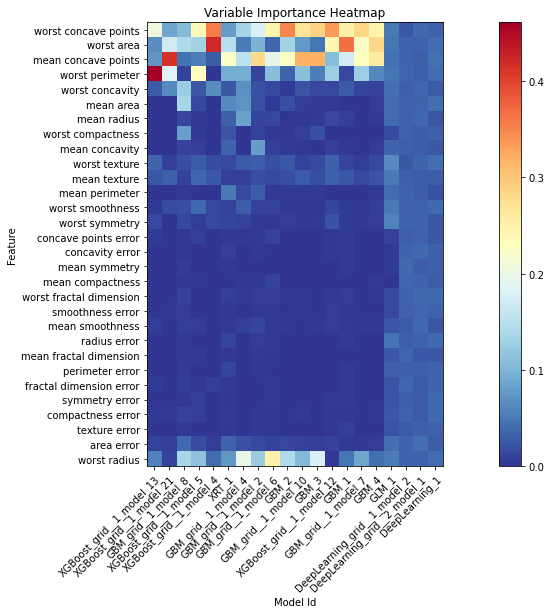

In [44]:
h2o_aml.varimp_heatmap();

## 32. Get model correlations
The `correlation of predictions` from various models on validation data can be plotted.

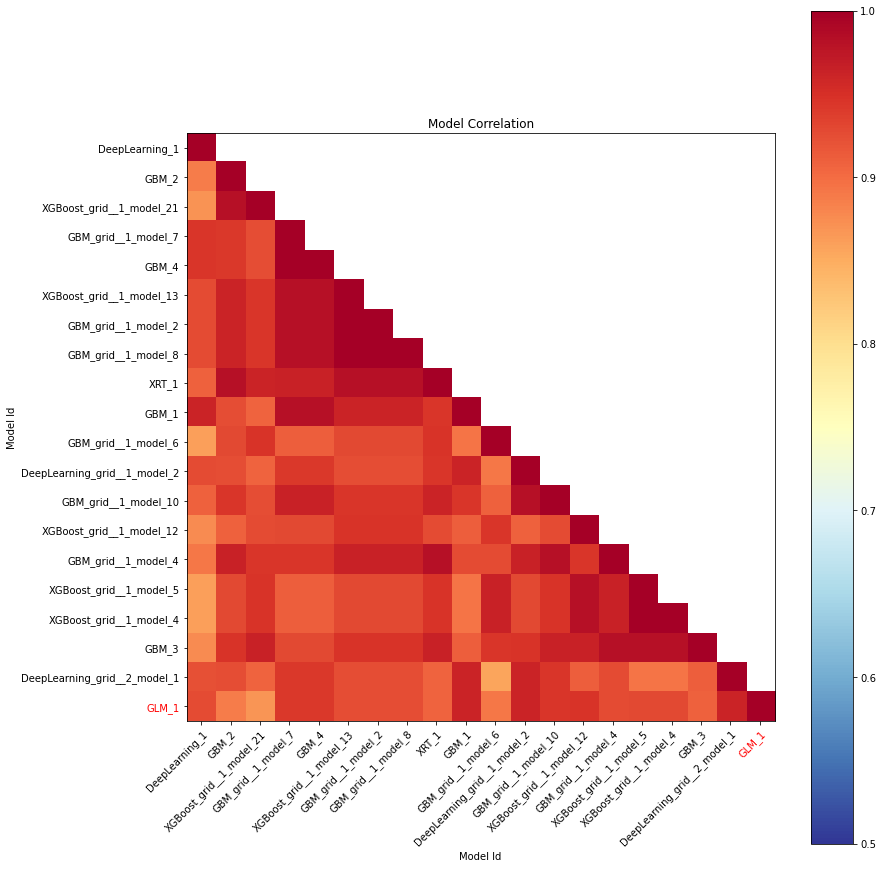

In [45]:
h2o_aml.model_correlation_heatmap(h2o_valid);

## 33. Get SHAP Summary
The `SHAP contribution` of each feature over all observations of validation data from a single model can be plotted.   
***P.S.*** *Only tree-based models are supported.*

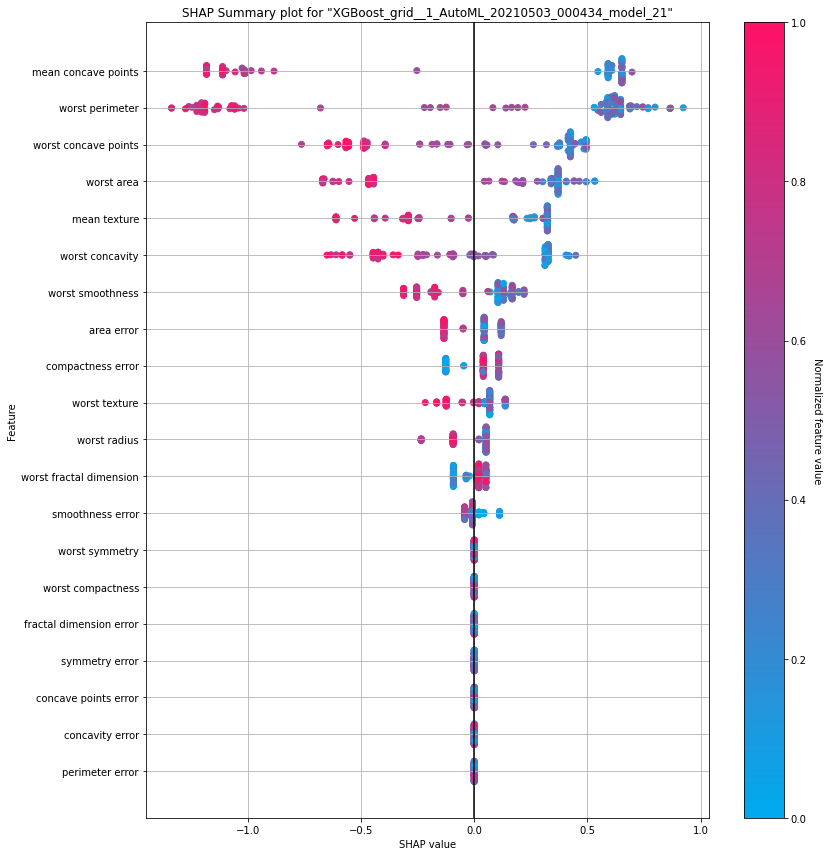

In [46]:
best_tree_model_id = [x for x in h2o_aml.leaderboard.as_data_frame().model_id if 'GBM' in x or 'XGBoost' in x or 'XRT' in x][0]
best_tree_model = h2o.get_model(best_tree_model_id)
best_tree_model.shap_summary_plot(h2o_valid);

## 34. Get SHAP for an observation
The `SHAP contribution` of each feature for a particular `observation` of validation data from a single model can be plotted.   
***P.S.*** *Only XGBoost and GBM are supported.*

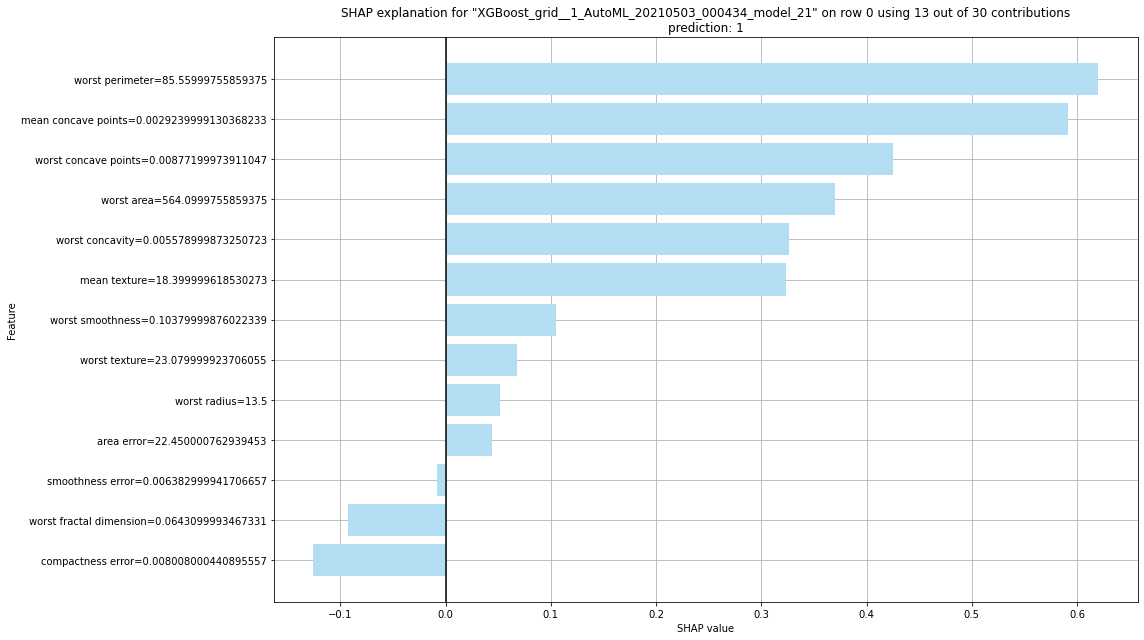

In [47]:
best_tree_model.shap_explain_row_plot(h2o_valid, row_index=0);

## 35. Get Partial Dependency Plots (PDP)
The `Partial Dependency Plots (PDP)` of each feature can be generated for all models, for each model as well as for each model and observation.

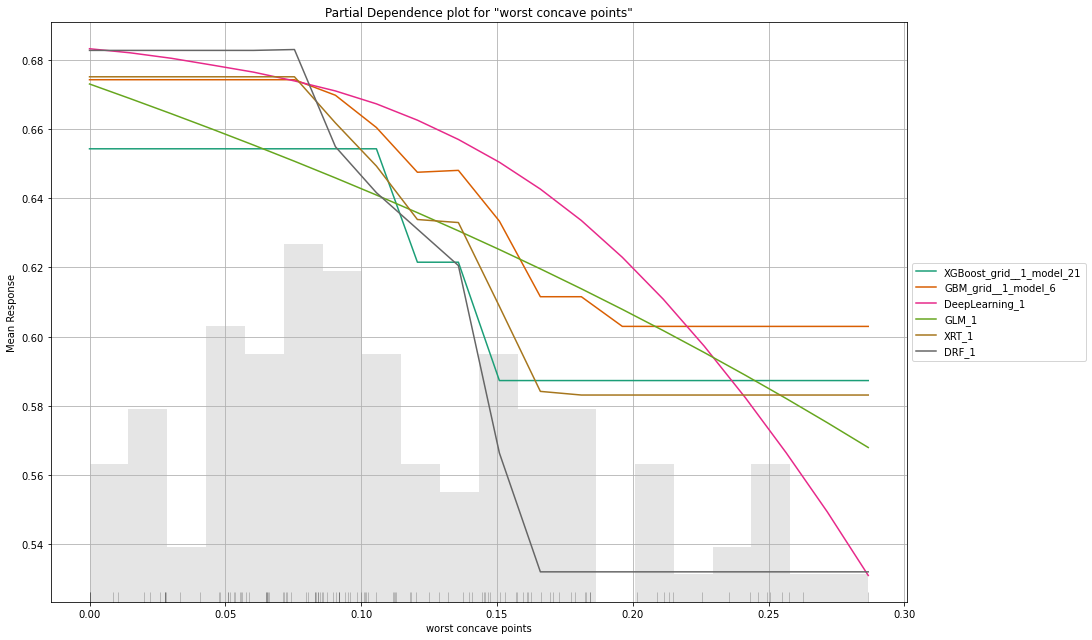

In [48]:
# pdp all models
h2o_aml.pd_multi_plot(h2o_valid, column='worst concave points');

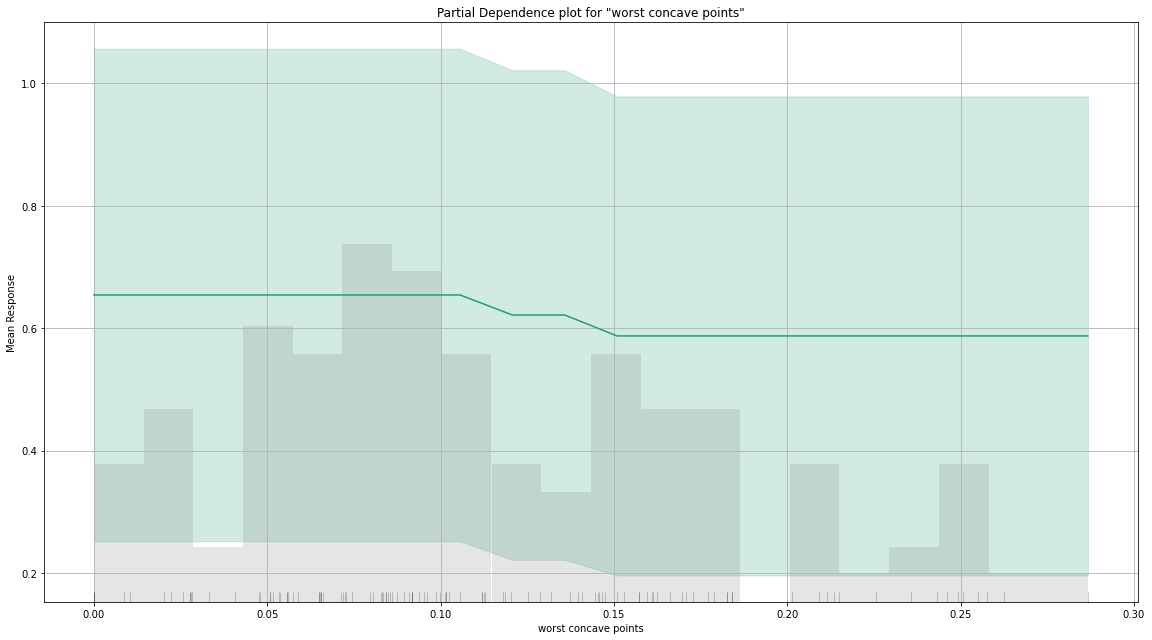

In [49]:
# pdp single model
h2o_aml.leader.pd_plot(h2o_valid, column='worst concave points');

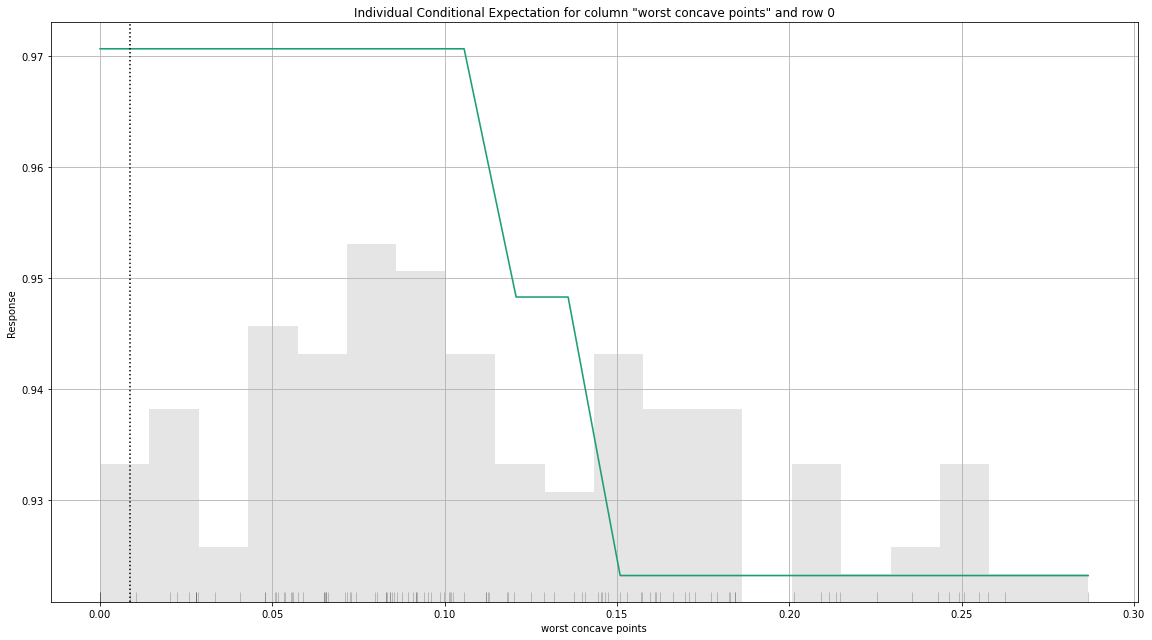

In [50]:
# pdp single model and single observation
h2o_aml.leader.pd_plot(h2o_valid, column='worst concave points', row_index=0);

## 36. Get Individual Conditional Expectation plots (ICE)
The `Individual Conditional Expectation (ICE)` plots of each model can be generated.

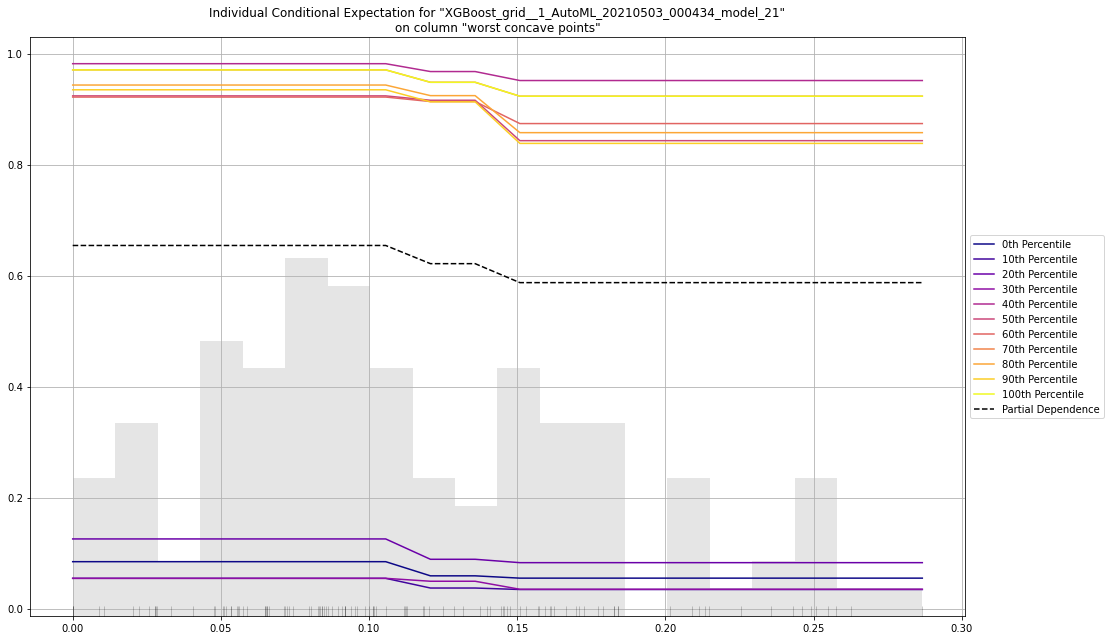

In [51]:
h2o_aml.leader.ice_plot(h2o_valid, column='worst concave points');

## 37. Explain a model
All the above interpretability features can be generated together.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid__1_AutoML_20210503_000434_model_21,0.998051,0.149716,0.998653,0.0263158,0.200643,0.0402576,94,0.275663,XGBoost
GBM_grid__1_AutoML_20210503_000434_model_6,0.998051,0.0935254,0.998653,0.0263158,0.171283,0.0293379,264,0.211488,GBM
GBM_3_AutoML_20210503_000434,0.998051,0.0922353,0.998653,0.0263158,0.161331,0.0260277,247,0.219873,GBM
GBM_grid__1_AutoML_20210503_000434_model_10,0.998051,0.097261,0.998653,0.0263158,0.166859,0.0278419,324,0.186925,GBM
DeepLearning_1_AutoML_20210503_000434,0.998051,0.0848856,0.998653,0.0263158,0.165557,0.027409,81,0.206366,DeepLearning
GLM_1_AutoML_20210503_000434,0.998051,0.126063,0.998653,0.0263158,0.18551,0.0344138,86,0.188072,GLM
GBM_grid__1_AutoML_20210503_000434_model_4,0.996101,0.127963,0.997255,0.0263158,0.198932,0.0395738,168,0.178373,GBM
GBM_1_AutoML_20210503_000434,0.996101,0.150815,0.997255,0.0263158,0.203959,0.0415994,239,0.216056,GBM
XGBoost_grid__1_AutoML_20210503_000434_model_4,0.996101,0.14715,0.997255,0.0263158,0.207019,0.0428571,1103,0.220048,XGBoost
GBM_grid__1_AutoML_20210503_000434_model_8,0.996101,0.153304,0.997255,0.0263158,0.214835,0.0461539,222,0.199859,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

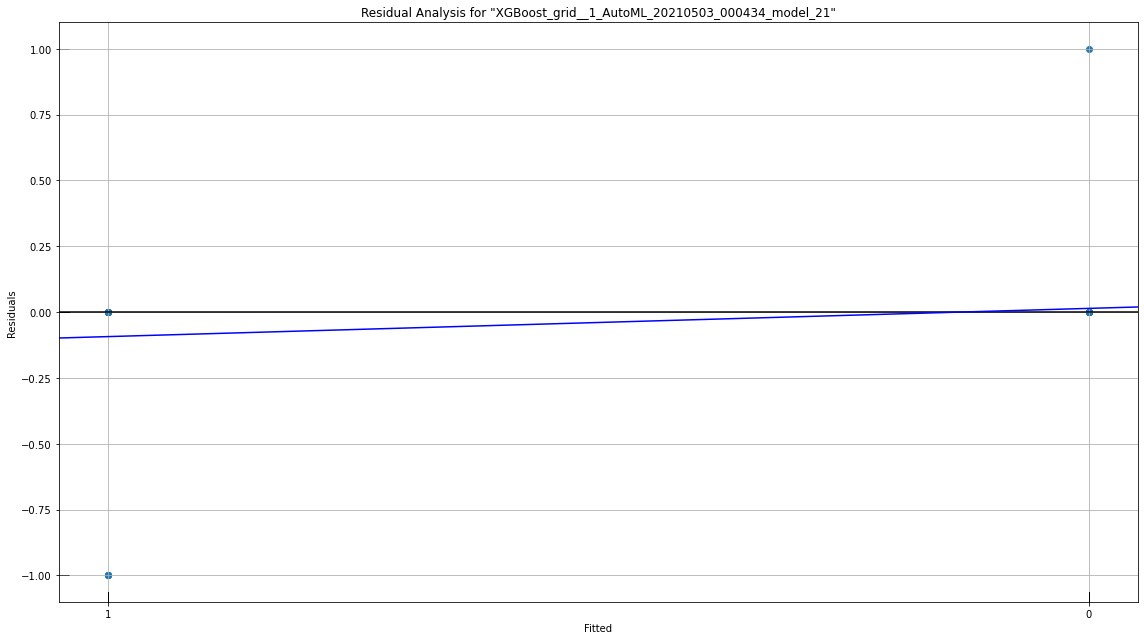

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

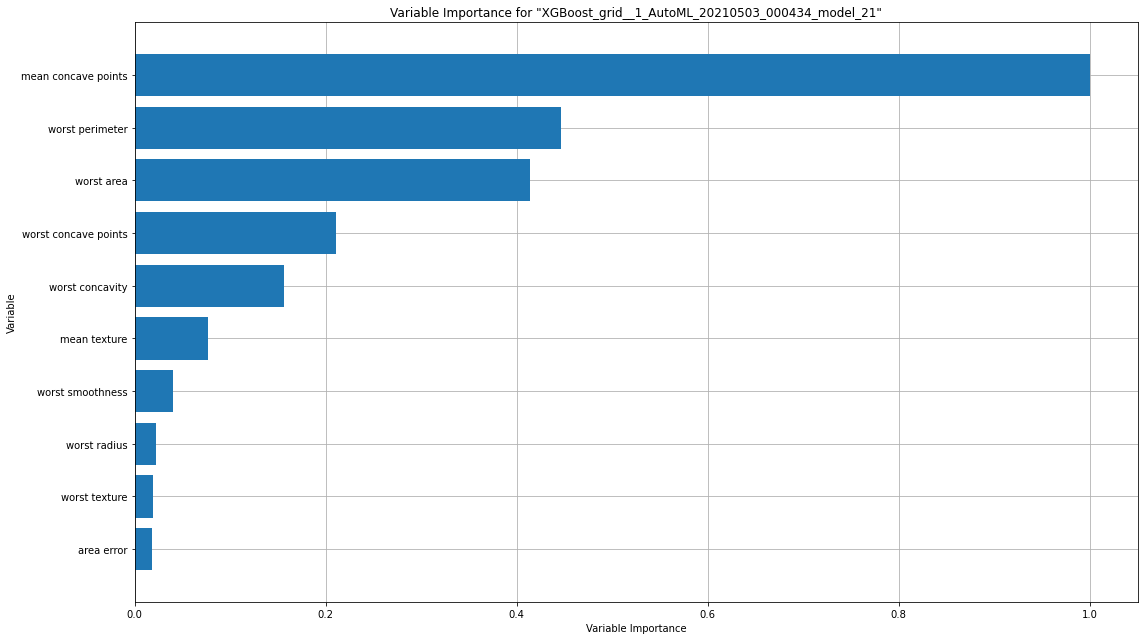

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

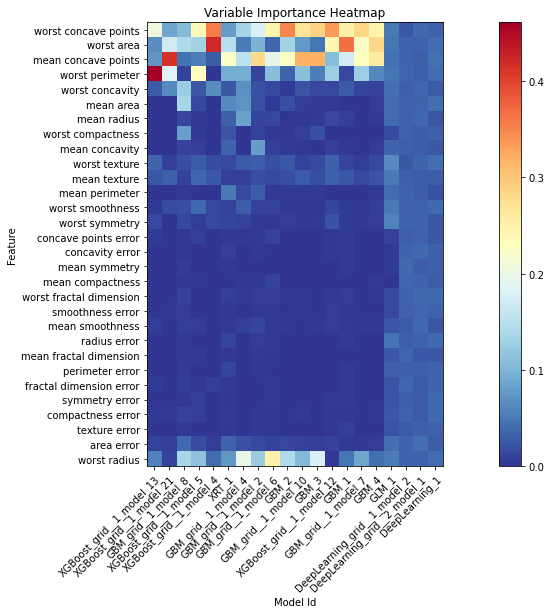

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

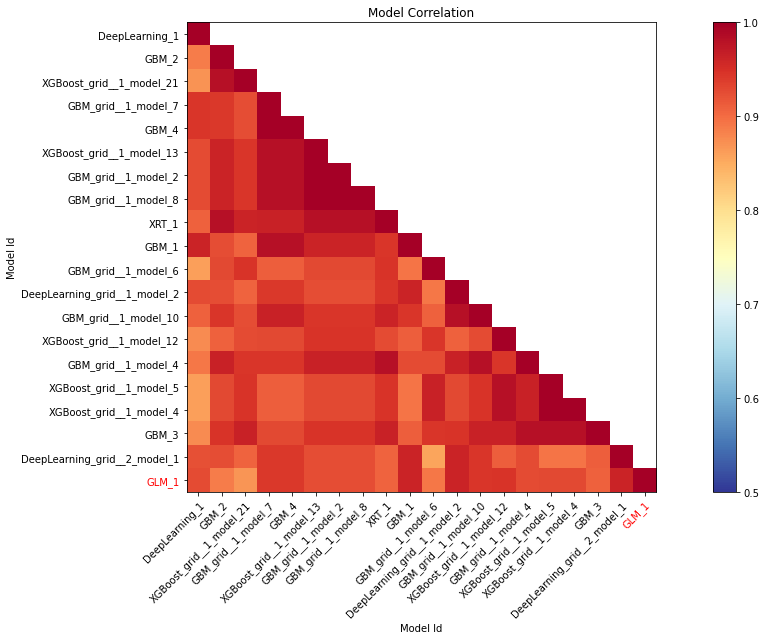

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

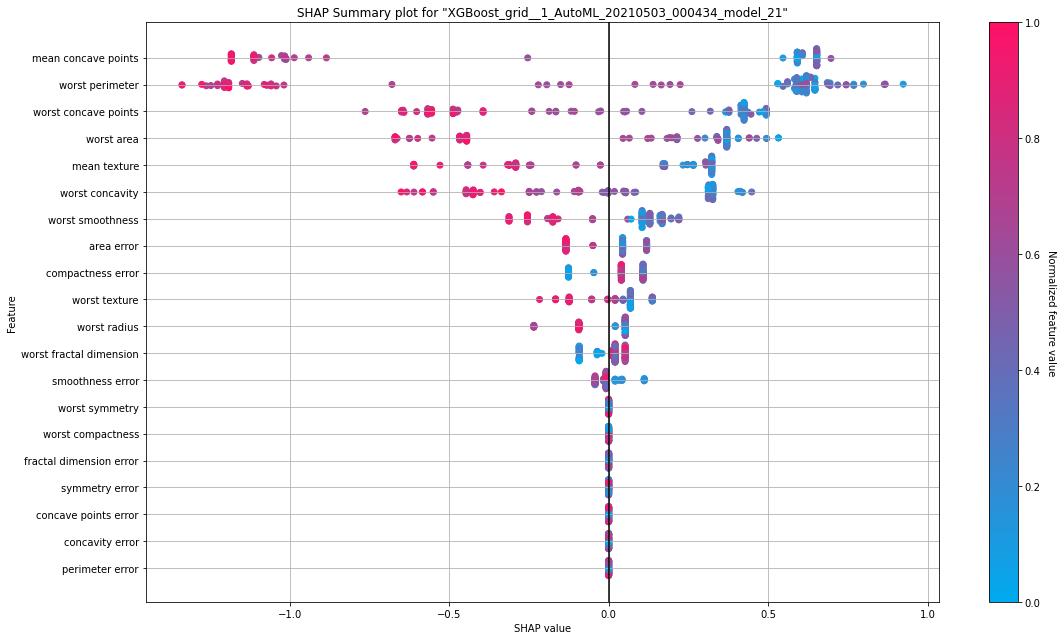

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

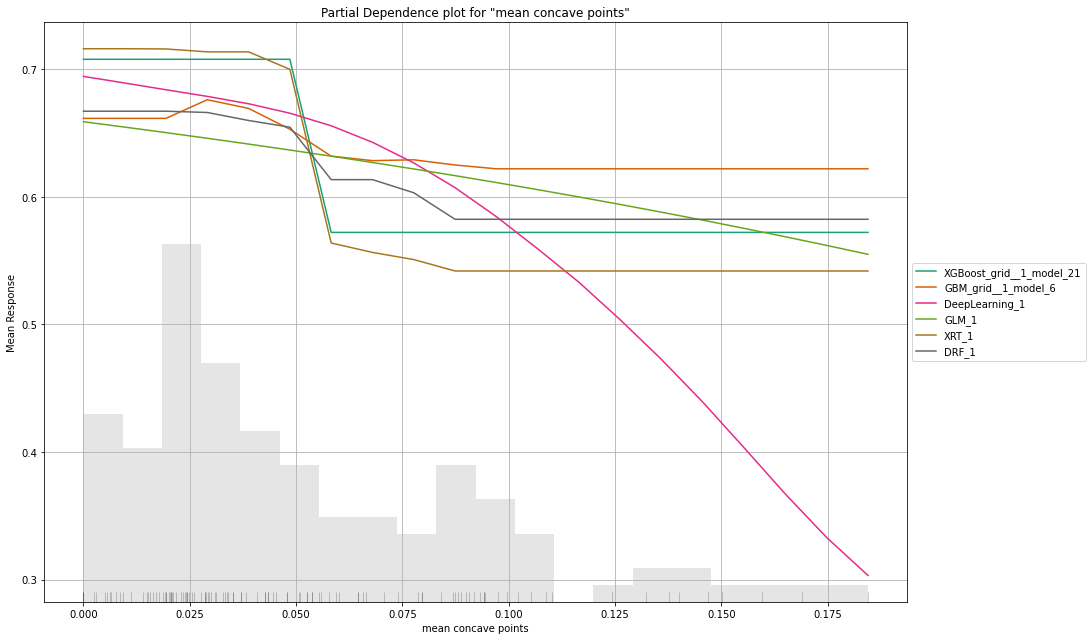

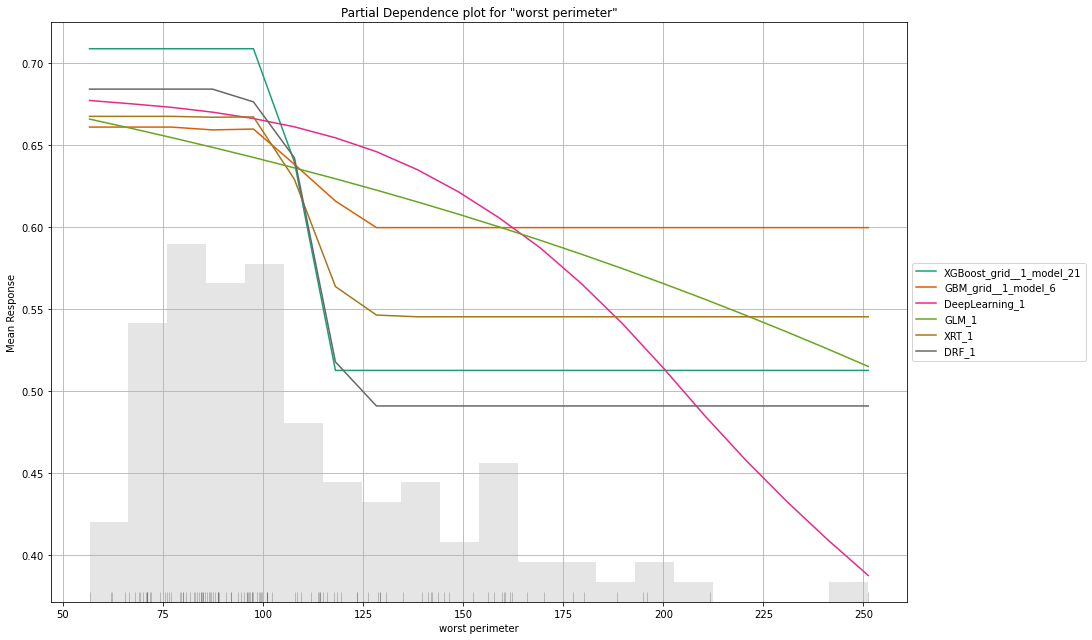

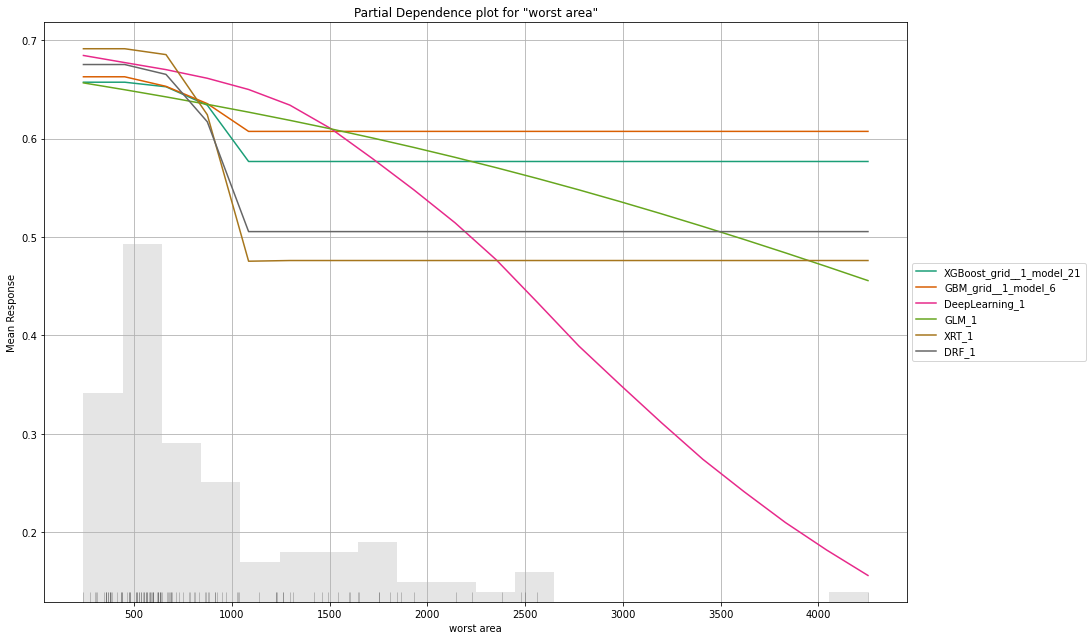

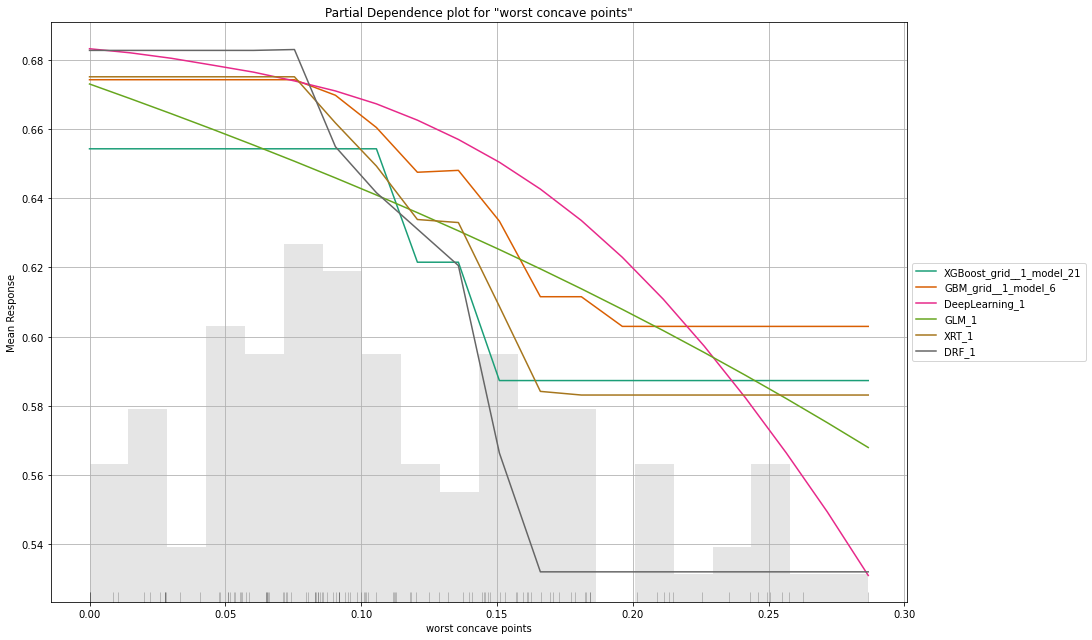

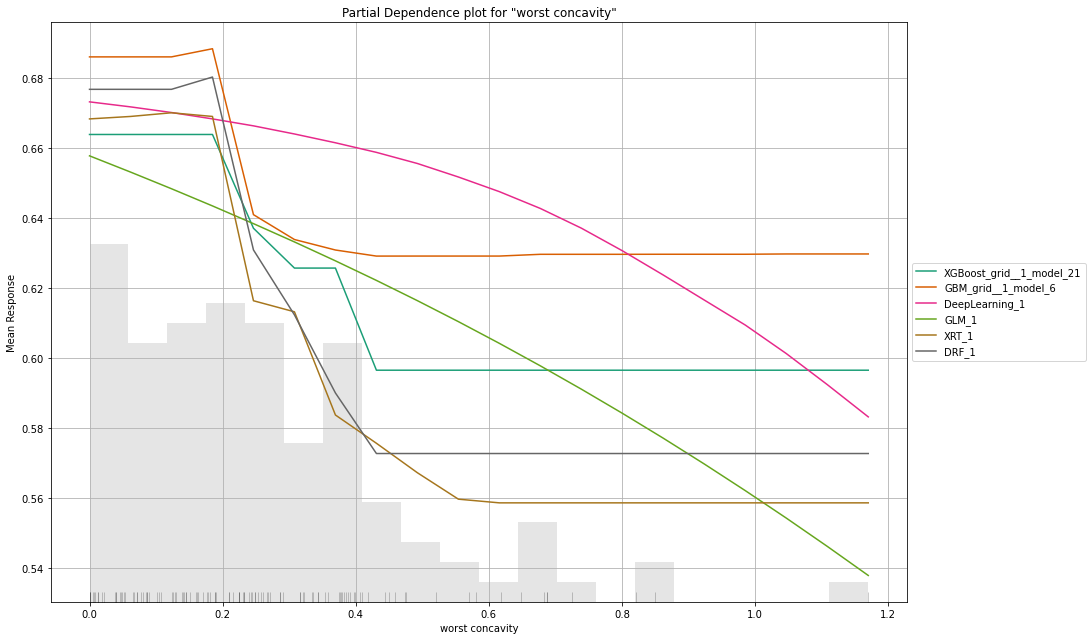

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

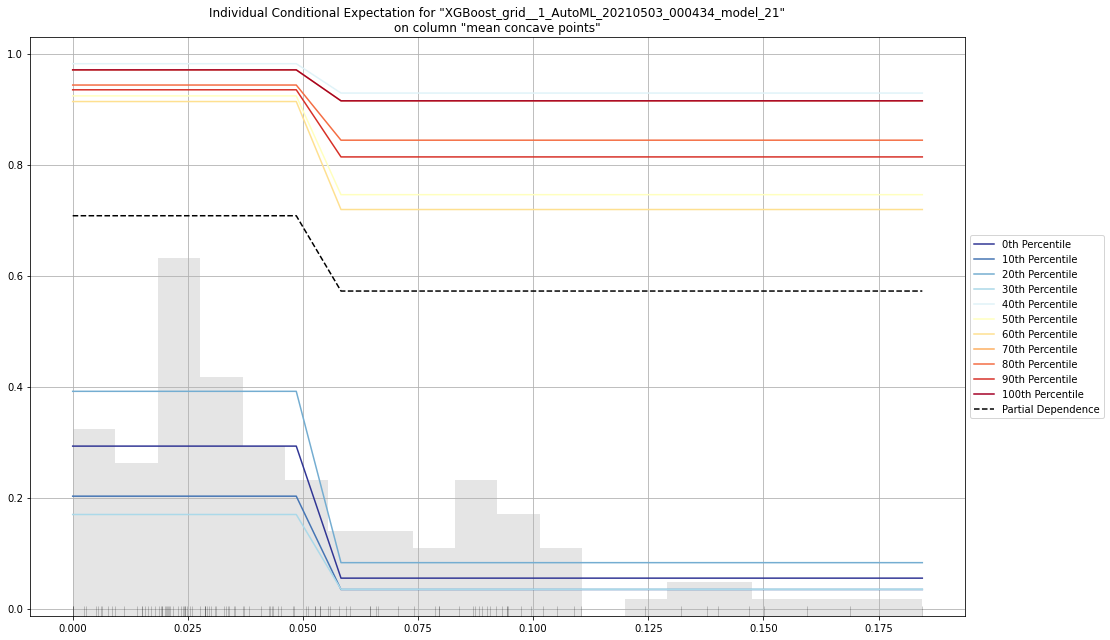

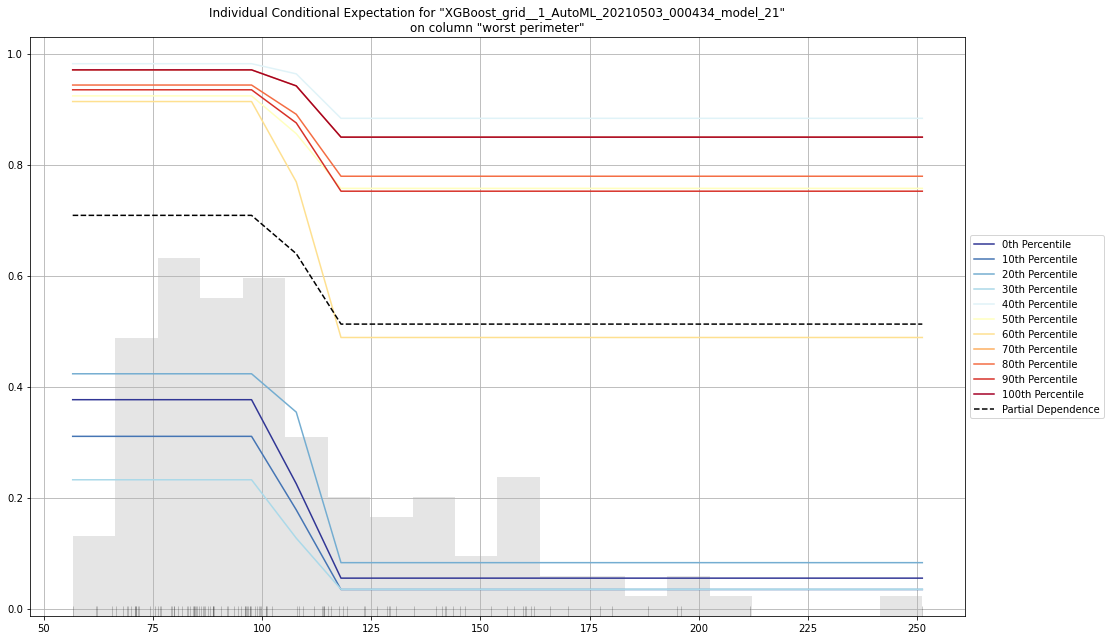

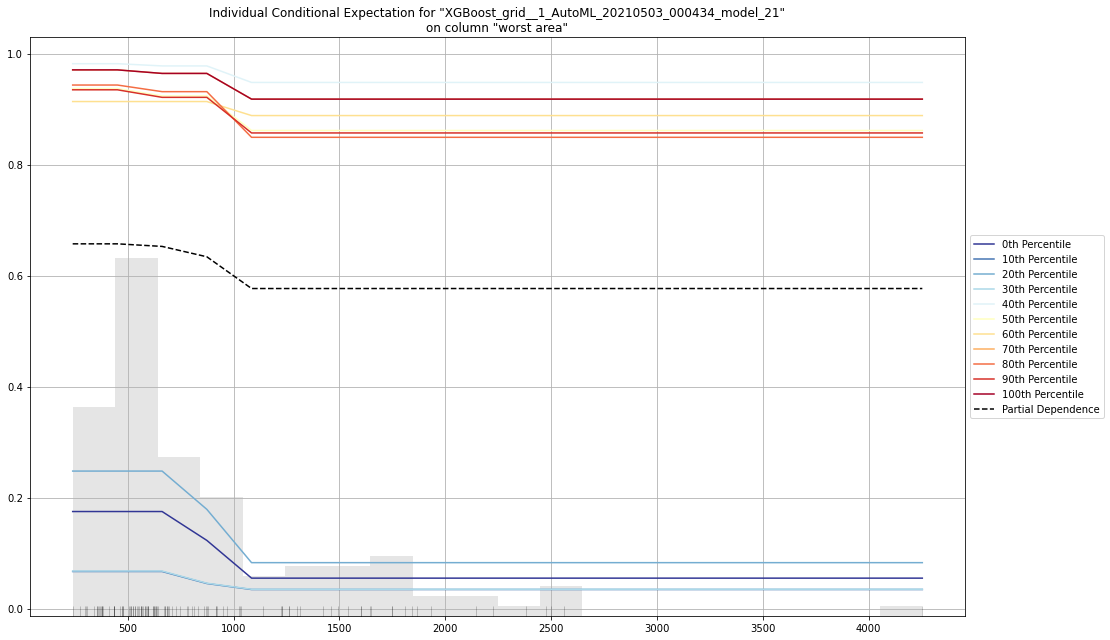

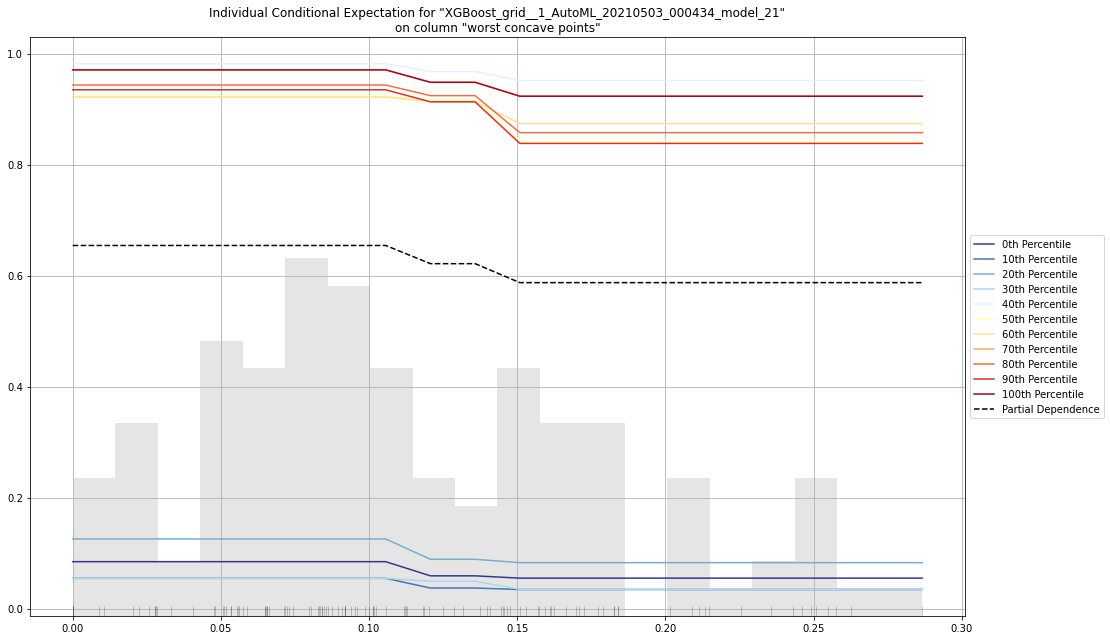

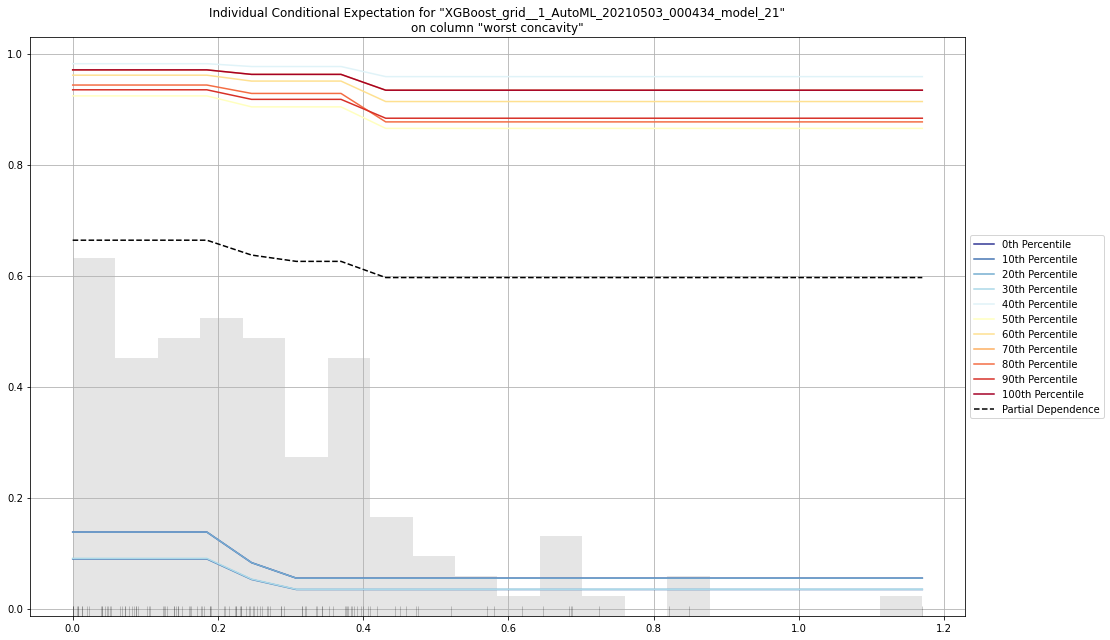

In [52]:
h2o.explain(h2o_aml, h2o_valid);

## 38. Check logs
The logs of H2OAutoML can be extracted using `event_log`.

In [53]:
h2o_aml.event_log.head(rows=h2o_aml.event_log.nrows)

timestamp,level,stage,message,name,value
00:04:34.588,Info,Workflow,Project: AutoML_20210503_00434588,,
00:04:34.588,Info,Validation,Cross-validation disabled by user: no fold column nor nfolds > 1.,,
00:04:34.588,Info,Validation,Setting stopping tolerance adaptively based on the training frame: 0.04688072309384954,,
00:04:34.588,Info,Validation,Build control seed: -1 (random),,
00:04:34.588,Info,DataImport,"Since cross-validation is disabled, and none of validation frame and leaderboard frame were provided, automatically split the training data into training, validation and leaderboard frames in the ratio 80/10/10",,
00:04:34.593,Info,DataImport,training frame: Frame key: automl_training_py_1756_sid_836c cols: 31 rows: 366 chunks: 1 size: 90544 checksum: 7196620539661792940,,
00:04:34.596,Info,DataImport,validation frame: Frame key: automl_validation_py_1756_sid_836c cols: 31 rows: 43 chunks: 1 size: 12984 checksum: -7324433221640276926,,
00:04:34.597,Info,DataImport,leaderboard frame: Frame key: automl_leaderboard_py_1756_sid_836c cols: 31 rows: 46 chunks: 1 size: 13704 checksum: -1689355368270709610,,
00:04:34.597,Info,DataImport,blending frame: NULL,,
00:04:34.597,Info,DataImport,response column: target,,


## 39. Save model as binary
An H2O model can be saved as a `binary` artifact.

In [ ]:
PATH_OUTPUT = '.'
h2o.save_model(h2o_aml.leader, path = PATH_OUTPUT)

## 40. Save model as mojo
An H2O model can be saved as a `mojo` artifact which is recommended for production.

In [ ]:
PATH_OUTPUT = './'
h2o_aml.leader.download_mojo(path = PATH_OUTPUT)

## 41. Go beyond
This just scratches the surface for `going beyond` and actually implementing AutoML on industry problems. The Kaggle TPS competitions are a great way to practise on different tabular datasets and below are some starter codes and additional resources to dive deeper.

**Examples**

* [Implementation on Kaggle TPS (January 2021) competition [Regression]](https://www.kaggle.com/rohanrao/automl-tutorial-tps-january-2021#H2O-AutoML)
* [Implementation on Kaggle TPS (February 2021) competition [Regression]](https://www.kaggle.com/rohanrao/automl-tutorial-tps-february-2021#H2O-AutoML)
* [Implementation on Kaggle TPS (March 2021) competition [Binary Classification]](https://www.kaggle.com/rohanrao/automl-tutorial-tps-march-2021#H2O-AutoML)
* [Implementation on Kaggle TPS (April 2021) competition [Binary Classification]](https://www.kaggle.com/rohanrao/automl-tutorial-tps-april-2021#H2O-AutoML)
* [Implementation on Kaggle TPS (May 2021) competition [Multiclass Classification]](https://www.kaggle.com/rohanrao/automl-tutorial-tps-may-2021#H2O-AutoML)

**Resources**

* [Product Website](https://www.h2o.ai/products/h2o-automl)
* [Source Code](https://github.com/h2oai/h2o-3)
* [Documentation](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)